<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<img src="https://i.postimg.cc/1z9rHvrQ/vecteezy-retro-old-vintage-mobile-cell-phone-push-button-from-the-90s-29753309.jpg">

<div style="border:4px solid navy; border-radius:30px; padding: 15px; background-size: cover">
<p><h2 style="color:navy; font-size:250%"><b>INTRODUCTION</b></h2></p>

<p><h5 style="font-size:130%; font-family:Arial ">Here we have a database about the features of mobile phones, which, based on the features of each phone, categorizes its price in a special category of 4 classes, which means the level of cheapness and expensiveness of each phone.
The purpose of this project is to use a classification based on the mentioned features for each mobile phone so that the price range can be accurately predicted.</h5></p>

# <b><p style="background-image: url(https://i.postimg.cc/bYsWk9TM/best-background-design-hd-9.jpg);background-size: cover;font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Table Of Content</p></b>

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; font-size:110%; text-align:left; background-image: url(https://i.postimg.cc/sXwGWcwC/download.jpg); background-size: cover">

<h2><span style="text-align:center; font-weight:bolder; color:navy; font-size:130%">Table of Contents:</span></h2>

 * **[Step 1 | Python Libraries](#setup)**
    -  [1.1 | Import Libraries](#import)
    -  [1.2 | Library configurations](#config)
 *  **[Step 2 | Data](#data)**
    -  [2.1 | Importing Data](#load_data)
    -  [2.2 | Data Informations](#info)
    -  [2.3 | Features](#features)
 *  **[Step 3 | visualizations](#visualizations)**
    -  [3.1 | Plots](#plots)
 *  **[Step 4 | Preprocessing](#prep)**
    -  [4.1 | Value](#value)
    -  [4.2 | Correlations](#corr)
    -  [4.3 | Define X ,y](#xy)
    -  [4.4 | Normalization](#norm)
 *  **[Step 5 | Modeling](#ml)**
    -  [5.1 | LinearRegression](#lr)
    -  [5.2 | DecisionTreeRegressor](#tree)
    -  [5.3 | RandomForestRegressor](#rf)
    -  [5.6 | Result](#result)
 *  **[Author](#author)**

In [1]:
# Imports

# Numpy
import numpy as np
# Pandas
import pandas as pd
pd.options.mode.copy_on_write = True

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Color output
from simple_colors import *

# Datetime
import datetime

In [2]:
# Input train data
Train = pd.read_csv('train.csv')
Train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
Test = pd.read_csv('test.csv')
Test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [4]:
# Describe
Train.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# Show all columns
columns = list(Train.columns)
for ind, column in enumerate(columns):
    print(ind+1, ':', column)

1 : battery_power
2 : blue
3 : clock_speed
4 : dual_sim
5 : fc
6 : four_g
7 : int_memory
8 : m_dep
9 : mobile_wt
10 : n_cores
11 : pc
12 : px_height
13 : px_width
14 : ram
15 : sc_h
16 : sc_w
17 : talk_time
18 : three_g
19 : touch_screen
20 : wifi
21 : price_range


In [6]:
# Type of columns
Train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [7]:
# d = Train[['battery_power', 'price_range']]
# d = d.groupby('price_range').size()
# labels = ['Low Cost', 'Medium Cost', 'High Cost', 'Very High']
# explode = (0, 0, 0, 0.05)
# ax[0, 1].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

## <font color='red'> Poting :

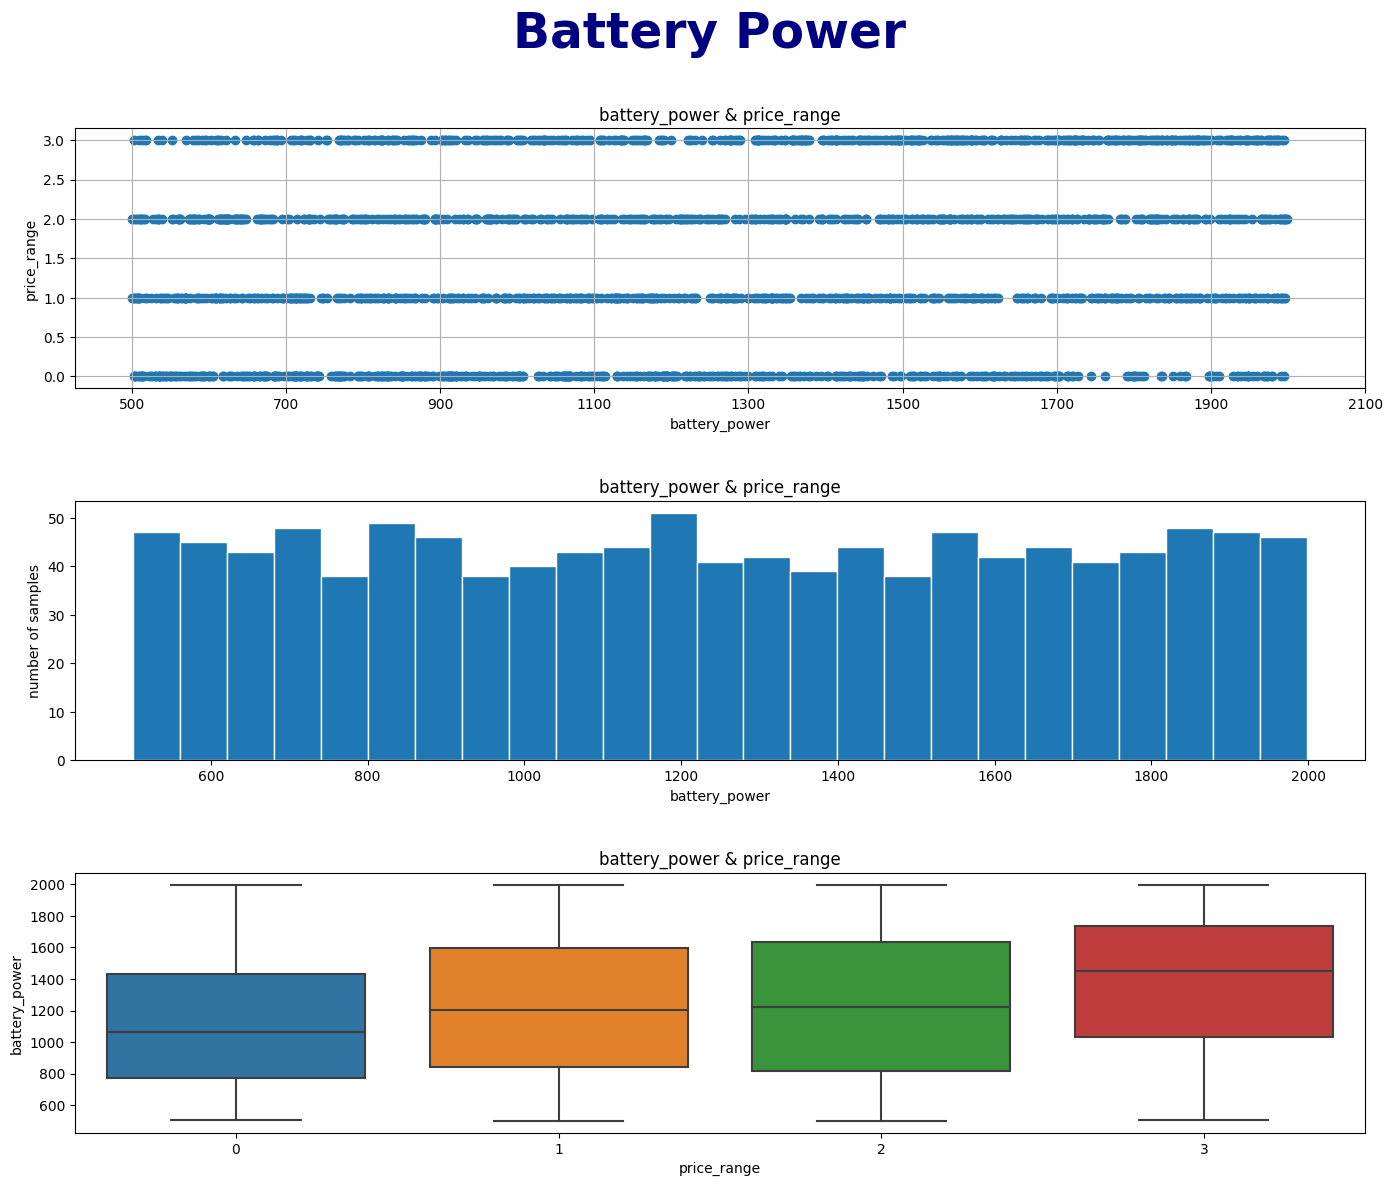

In [8]:
# Col 1 : battery_power

title = 'battery_power & price_range'

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Battery Power', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax1 ---> scatter
ax1.scatter(Train.battery_power, Train.price_range)
ax1.set(title=title, xlabel='battery_power', ylabel='price_range', xticks=np.arange(500, 2200, 200))
ax1.grid()


# ax 2
x = Train.battery_power.value_counts().sort_values().index
y = Train.battery_power.value_counts().sort_values()
ax2.hist(x, bins=25, histtype='bar', edgecolor='white')
ax2.set(title=title, xlabel='battery_power', ylabel='number of samples')


# ax3 ---> boxplot
sns.boxplot(x='price_range', y='battery_power', data=Train).set(title=title)

plt.show()

### <font color='blue'> Result :  
    - battery_pwoer is in range [501, 1998].  
    - There is no noise.  

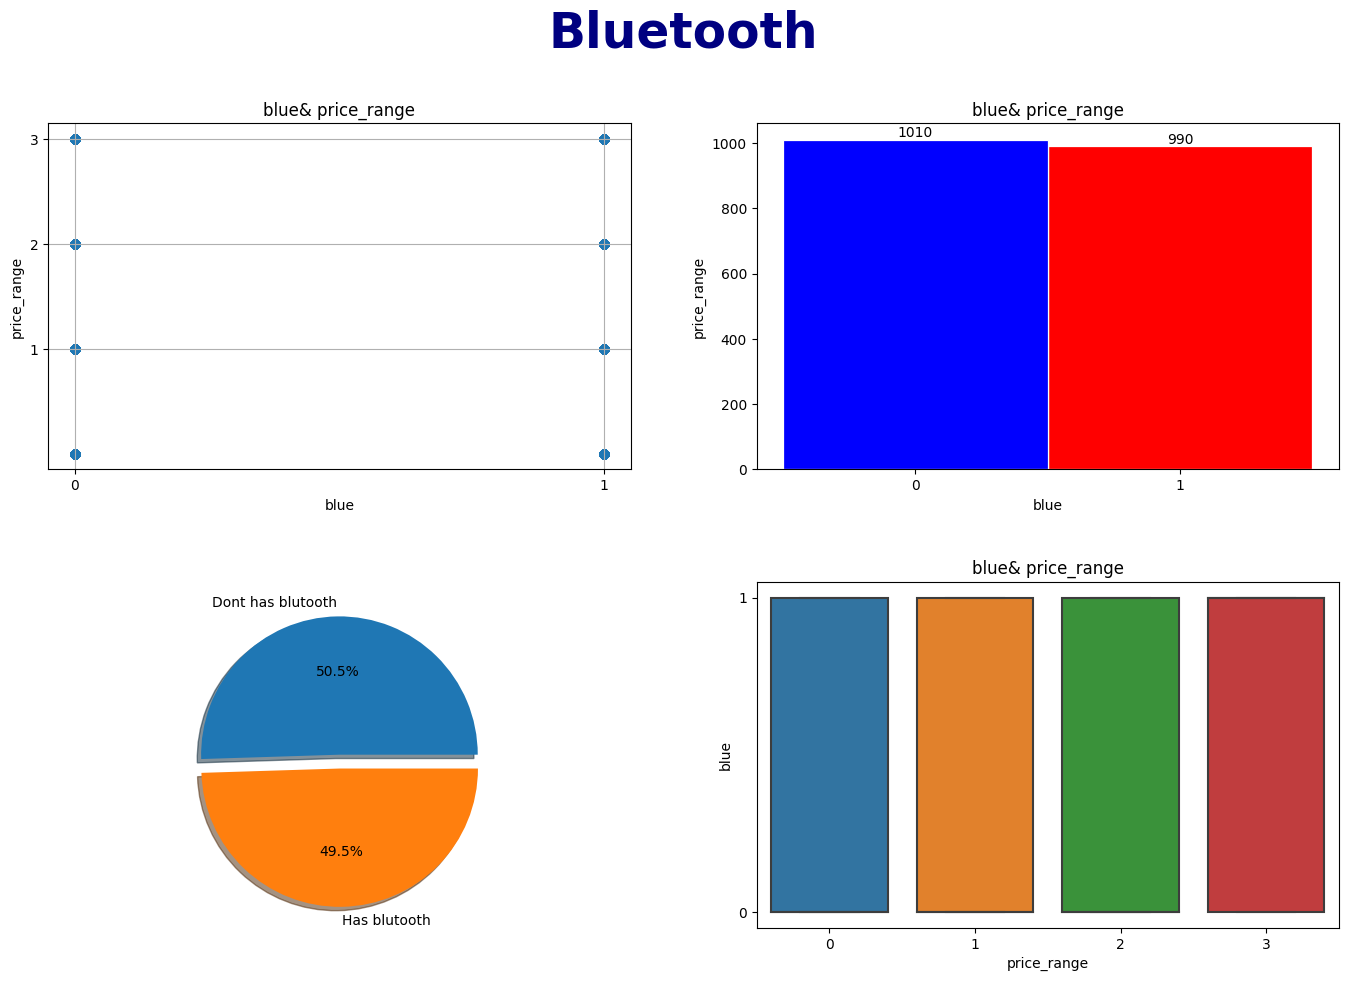

In [9]:
# Col 2 : blue               

title = 'blue& price_range'

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('Bluetooth', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax[0, 0] ---> scatter
ax[0, 0].scatter(Train.blue, Train.price_range)
ax[0, 0].set(title=title, xlabel='blue', ylabel='price_range', xticks=np.arange(0, 1.5), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
c = ['red', 'blue']
x = Train.blue.value_counts().sort_values().index
y = Train.blue.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='blue', ylabel='price_range', xticks=np.arange(0, 1.5))


# ax 3
d = Train[['blue']]
d = d.groupby('blue').size()
labels = ['Dont has blutooth', 'Has blutooth']
explode = (0, 0.1)
ax[1, 0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='blue', data=Train).set(title=title, yticks=np.arange(0, 1.5))

plt.show()

### <font color='blue'> Result :  
    - bluetooth feature is in [0, 1].  
    - There is no noise.  
    - 50.5% (1010) of samples dont have bluetooth.  
    - 49.5% (990) of samples have bluetooth.  

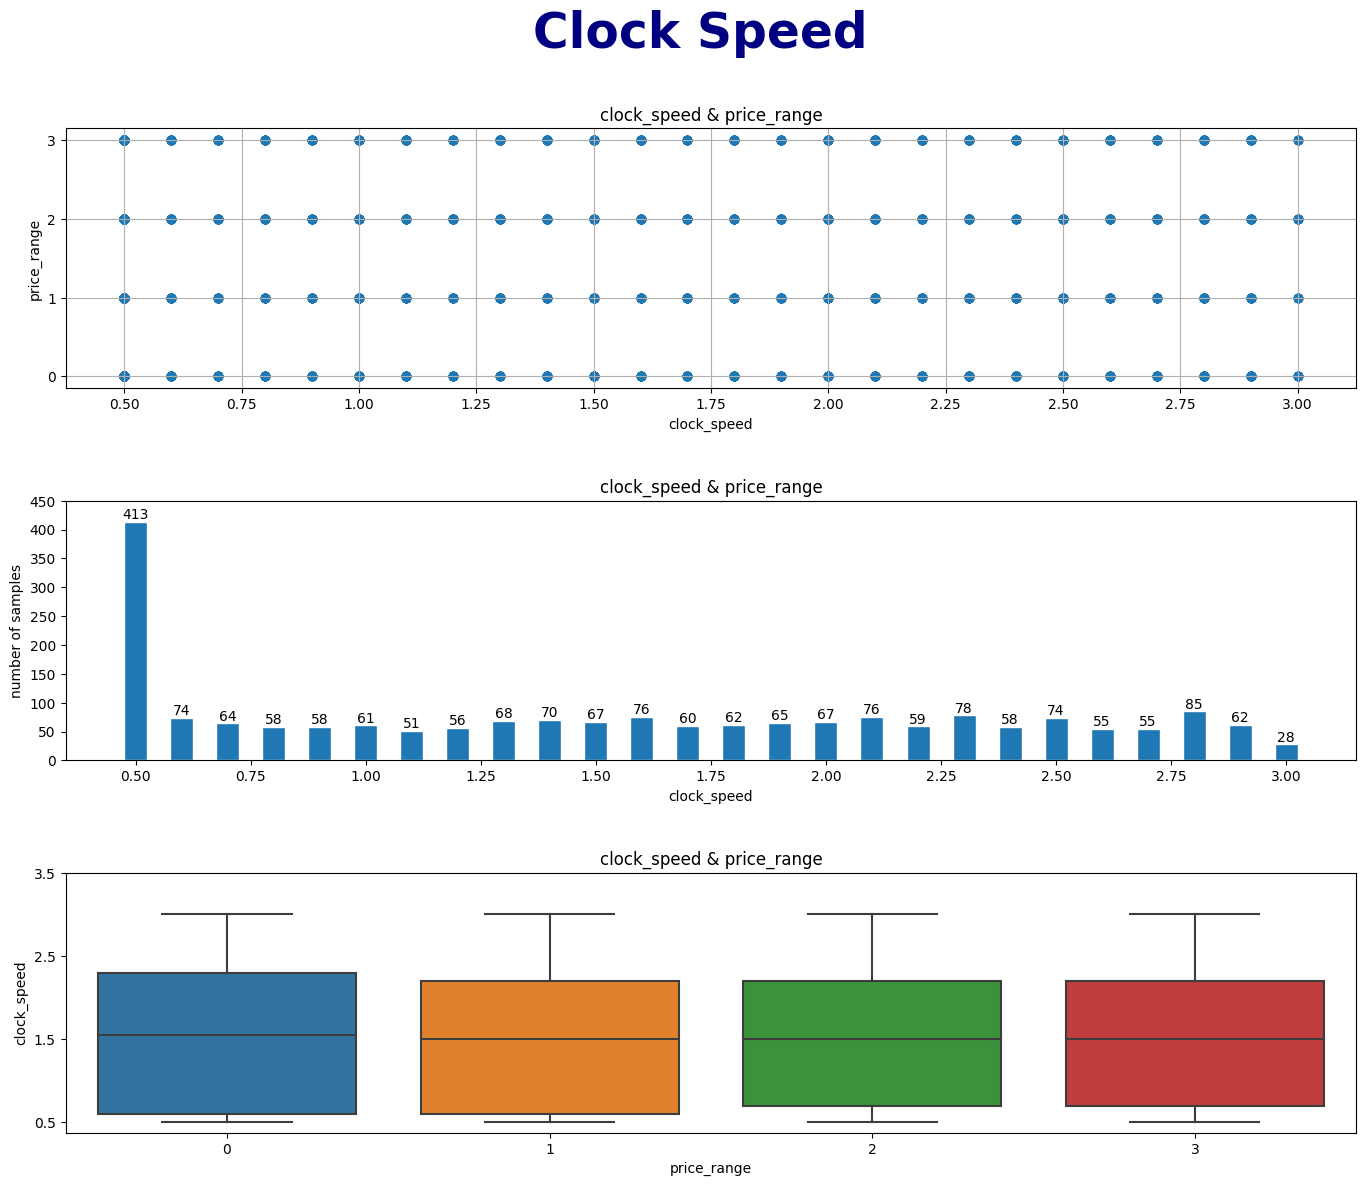

In [10]:
# Col 3 : clock_speed

title = 'clock_speed & price_range'

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Clock Speed', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax1 ---> scatter
ax1.scatter(Train.clock_speed, Train.price_range)
ax1.set(title=title, xlabel='clock_speed', ylabel='price_range', xticks=np.arange(0.5, 3.25, 0.25), yticks=np.arange(0, 4))
ax1.grid()


# ax 2
x = Train.clock_speed.value_counts().sort_values().index
y = Train.clock_speed.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.05, edgecolor="white")
ax2.bar_label(bar_container)
ax2.set(title=title, xlabel='clock_speed', ylabel='number of samples', xticks=np.arange(0.5, 3.1, 0.25), yticks=np.arange(0, 460, 50))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='clock_speed', data=Train).set(title=title, yticks=np.arange(0.5, 4))

plt.show()

### <font color='blue'> Result :  
    - Bluetooth feature is in [0.5, 3].  
    - There is no noise.  
    - The distribution of data in each price group is similar. 
    - Maximum number of samples (413 sapmples) have 0 value.  
    - Minimum number of samples (28 sapmples) have 3.0 value.  
    - Other samples with value in (0.5, 3) are in range [51, 85]

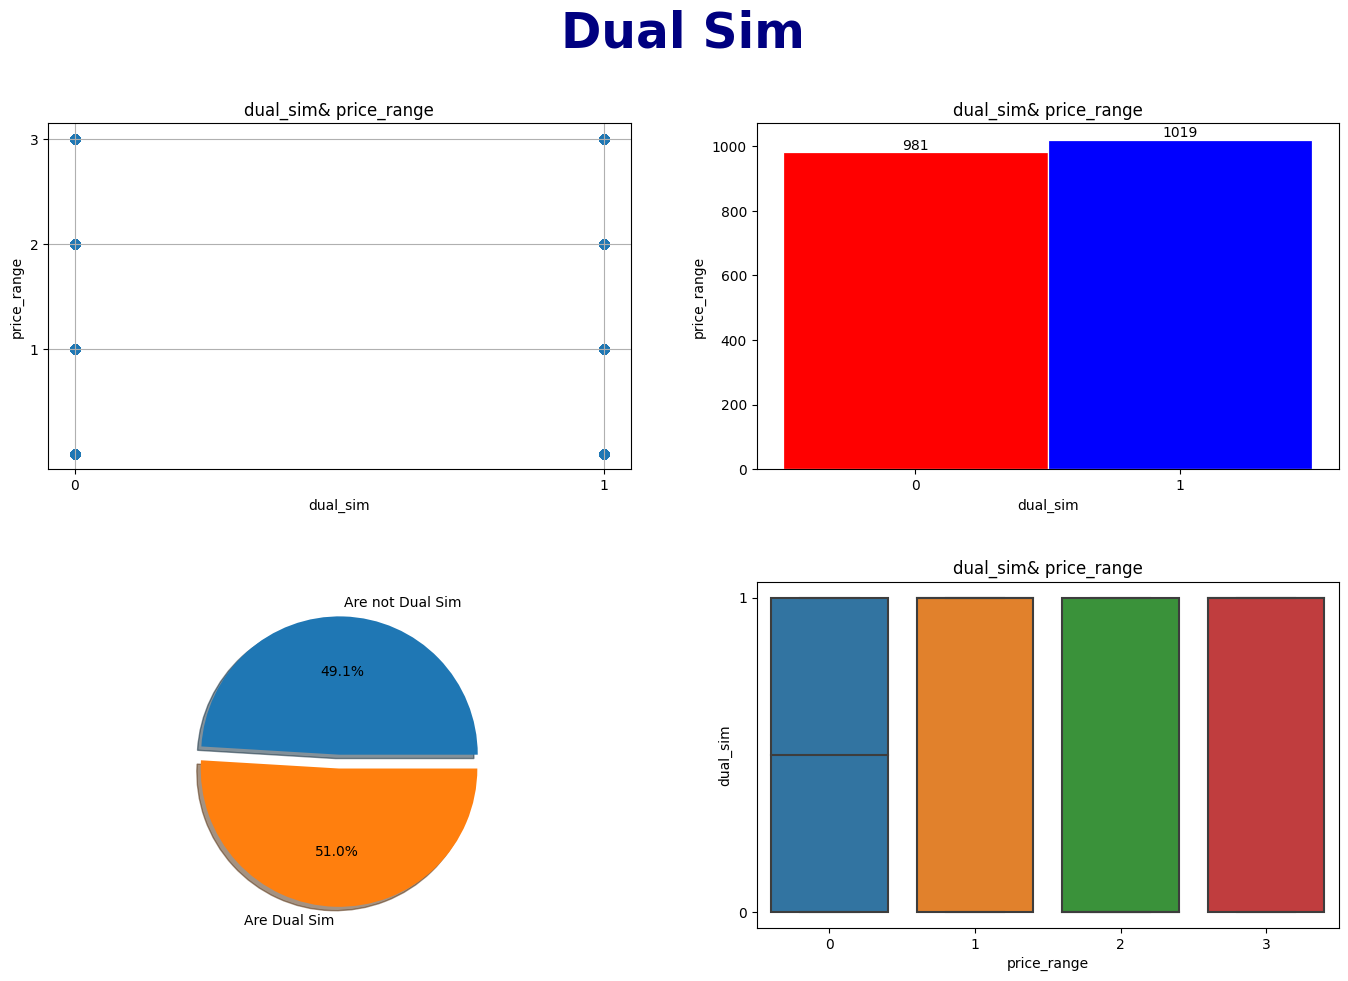

In [11]:
# Col 4 : dual_sim               

title = 'dual_sim& price_range'

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('Dual Sim', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax[0, 0] ---> scatter
ax[0, 0].scatter(Train.dual_sim, Train.price_range)
ax[0, 0].set(title=title, xlabel='dual_sim', ylabel='price_range', xticks=np.arange(0, 1.5), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
c = ['red', 'blue']
x = Train.dual_sim.value_counts().sort_values().index
y = Train.dual_sim.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='dual_sim', ylabel='price_range', xticks=np.arange(0, 1.5))


# ax 3
d = Train[['dual_sim']]
d = d.groupby('dual_sim').size()
labels = ['Are not Dual Sim', 'Are Dual Sim']
explode = (0, 0.1)
ax[1, 0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='dual_sim', data=Train).set(title=title, yticks=np.arange(0, 1.5))

plt.show()

### <font color='blue'> Result :  
    - Dual_sim feature is in [0, 1].  
    - There is no noise.  
    - 49.1 % (981) of samples dont have dual sim.  
    - 51.0 % (1019) of samples have dual sim.  

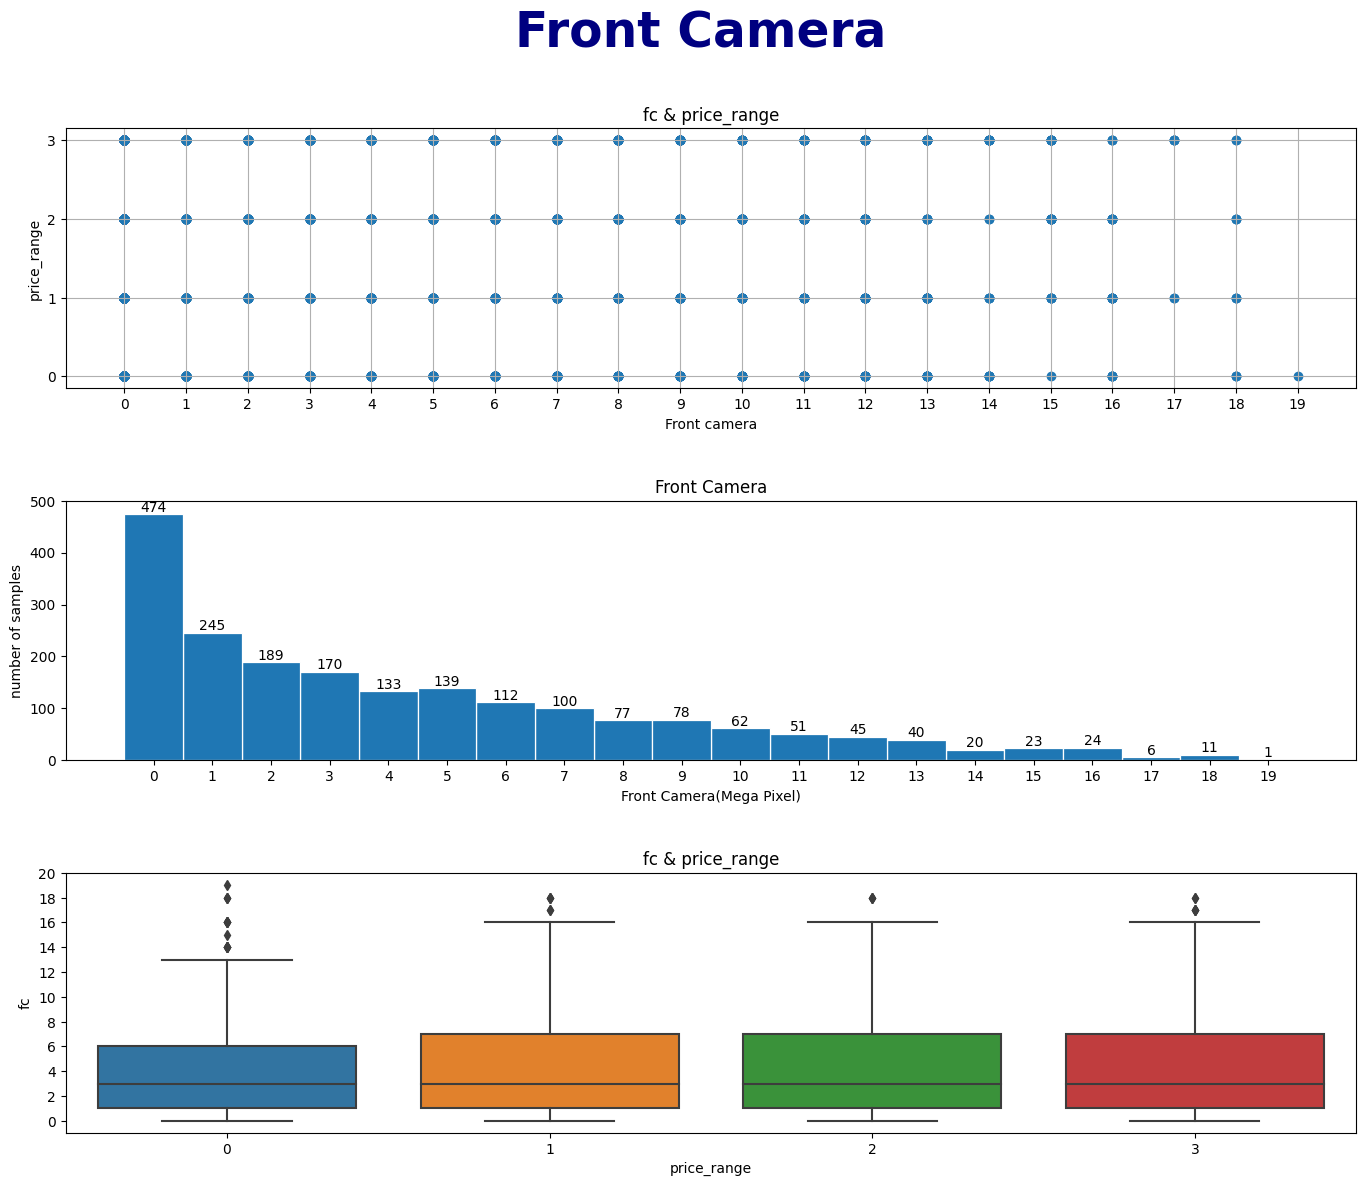

In [12]:
# Col 5 : fc (Front camera)

title = 'fc & price_range'

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Front Camera', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(Train.fc, Train.price_range)
ax1.set(title=title, xlabel='Front camera', ylabel='price_range', xticks=np.arange(0, 20), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = Train.fc.value_counts().sort_values().index
y = Train.fc.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='Front Camera', xlabel='Front Camera(Mega Pixel)', ylabel='number of samples', xticks=np.arange(0, 20, 1), yticks=np.arange(0, 510, 100))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='fc', data=Train).set(title=title, yticks=np.arange(0, 21, 2))

plt.show()

### <font color='blue'> Result :  
    - Bluetooth feature is in [0, 19].  
    - There is no noise.  
    - The distribution of data in each price group is similar.  
    - Most of data (474) have not front camera .
    - The distribution goes downward.  
    - The median of each price_range is about 3.  

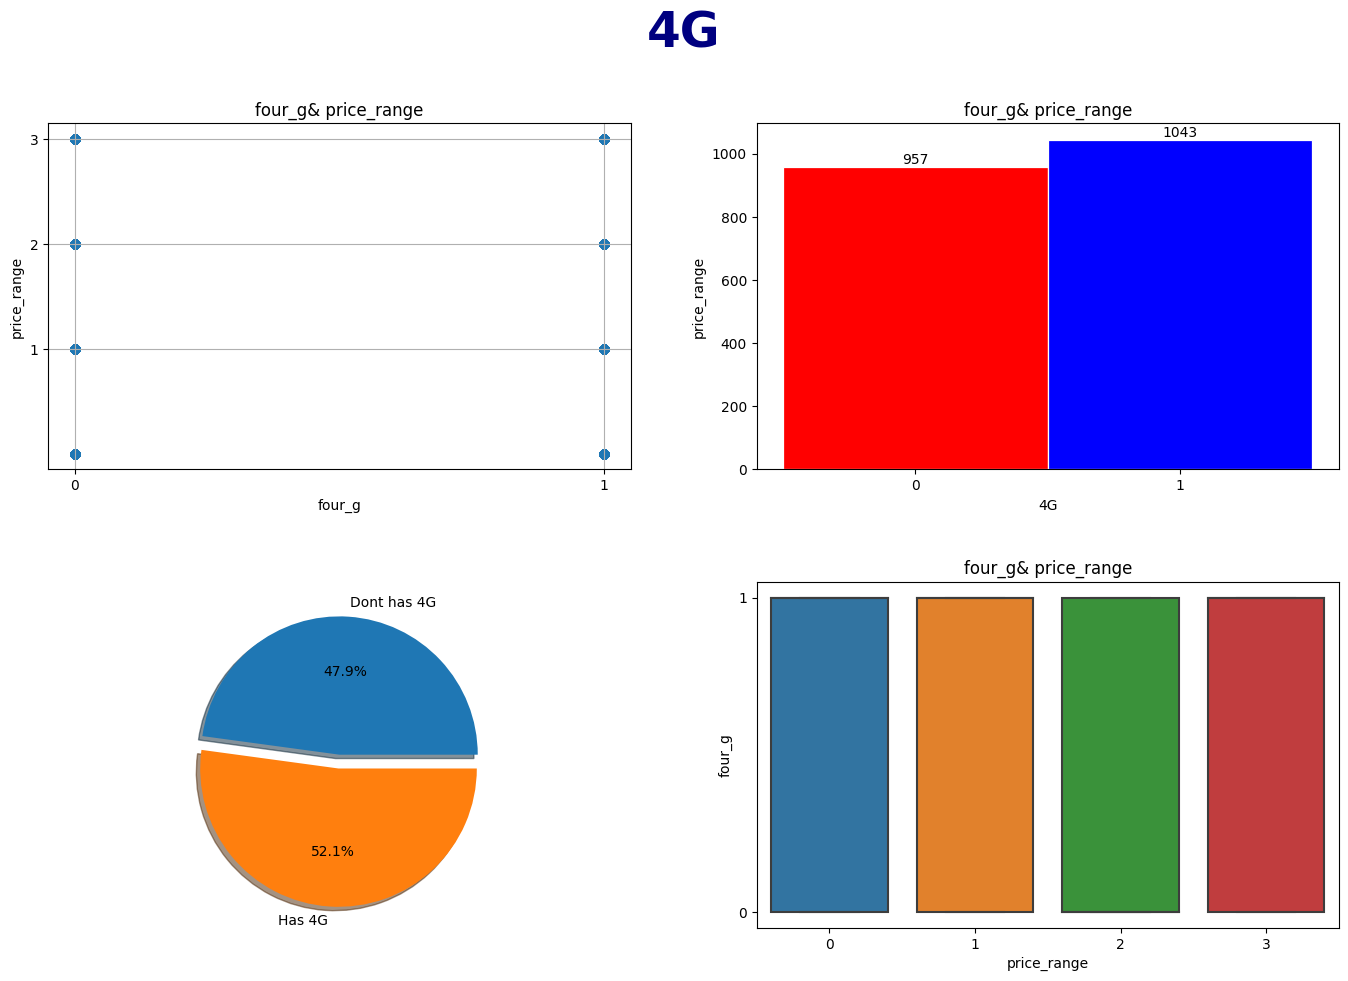

In [13]:
# Col 6 : four_g               

title = 'four_g& price_range'

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('4G', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax[0, 0] ---> scatter
ax[0, 0].scatter(Train.four_g, Train.price_range)
ax[0, 0].set(title=title, xlabel='four_g', ylabel='price_range', xticks=np.arange(0, 1.5), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
c = ['red', 'blue']
x = Train.four_g.value_counts().sort_values().index
y = Train.four_g.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='4G', ylabel='price_range', xticks=np.arange(0, 1.5))


# ax 3
d = Train[['four_g']]
d = d.groupby('four_g').size()
labels = ['Dont has 4G', 'Has 4G']
explode = (0, 0.1)
ax[1, 0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='four_g', data=Train).set(title=title, yticks=np.arange(0, 1.5))

plt.show()

### <font color='blue'> Result :  
    - 4g feature is in boolean.  
    - There is no noise.  
    - 47.9 % (957) of samples dont have 4G.  
    - 52.1 % (1043) of samples have 4G.  

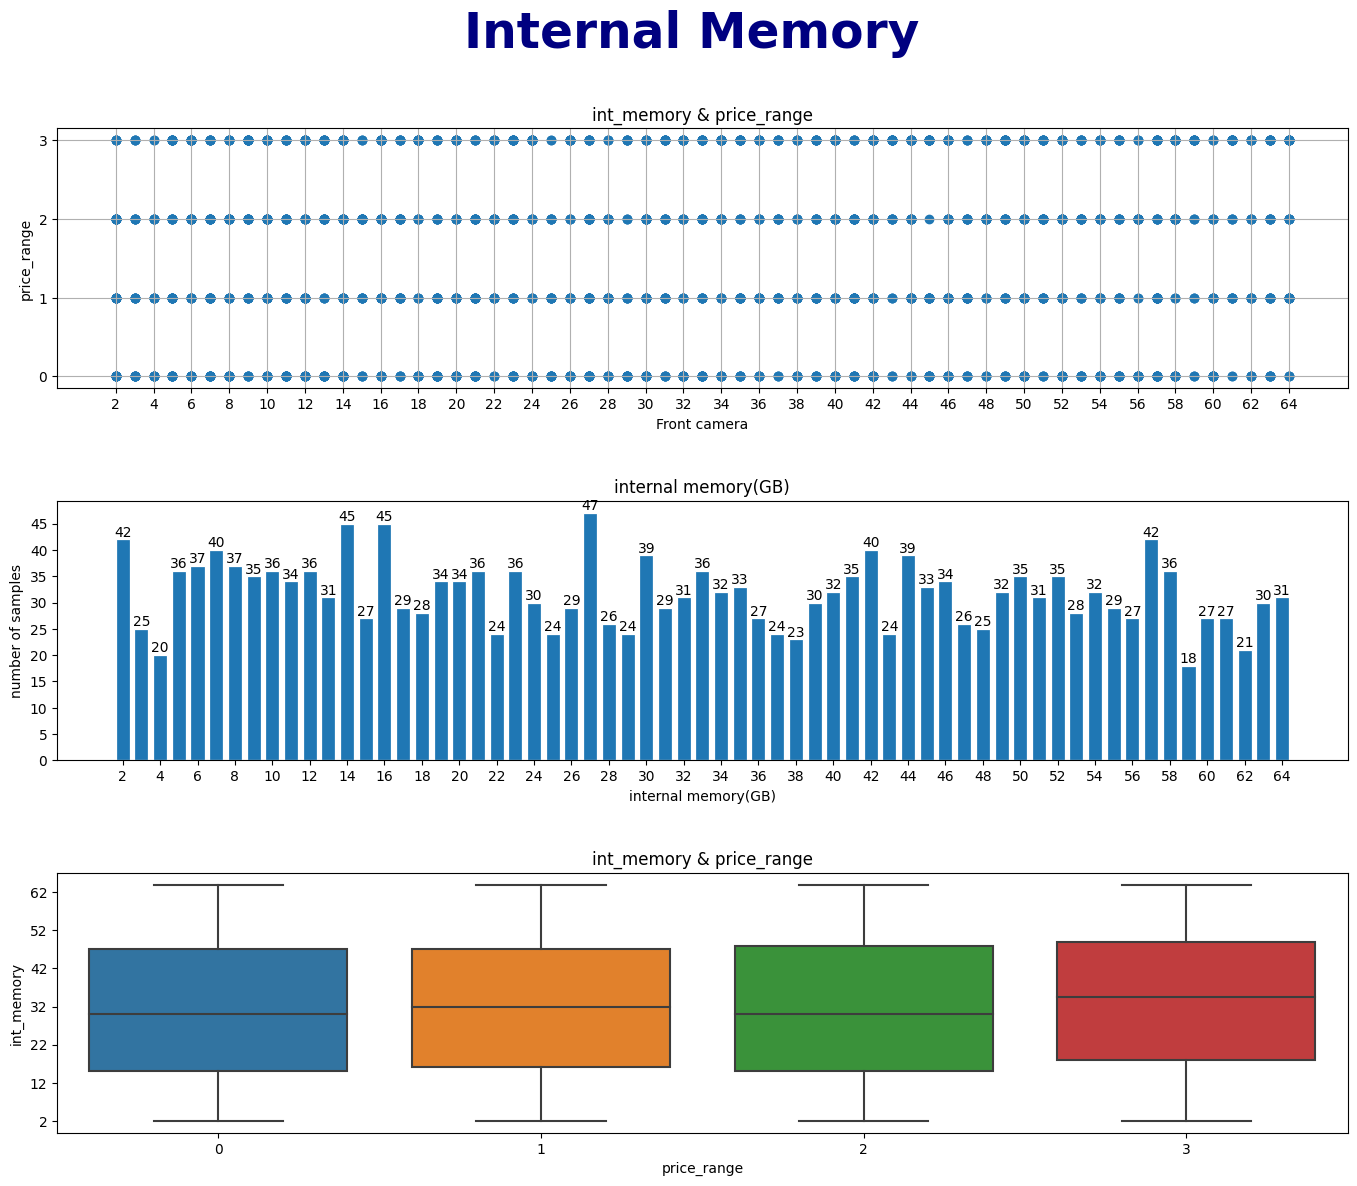

In [14]:
# Col 7 : int_memory

title = 'int_memory & price_range'

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Internal Memory', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(Train.int_memory, Train.price_range)
ax1.set(title=title, xlabel='Front camera', ylabel='price_range', xticks=np.arange(2, 65, 2), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = Train.int_memory.value_counts().sort_values().index
y = Train.int_memory.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.75, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='internal memory(GB)', xlabel='internal memory(GB)', ylabel='number of samples', xticks=np.arange(2, 65, 2), yticks=np.arange(0, 50, 5))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='int_memory', data=Train).set(title=title, yticks=np.arange(2, 70, 10))

plt.show()

### <font color='blue'> Result :  
    - Interal memory feature is in [2, 64].  
    - There is no noise.  
    - The distribution of data in each price group is similar.  
    - Most of data (47) have value of 27 . 
    - All the samples in each price_range group, have normal contributions.

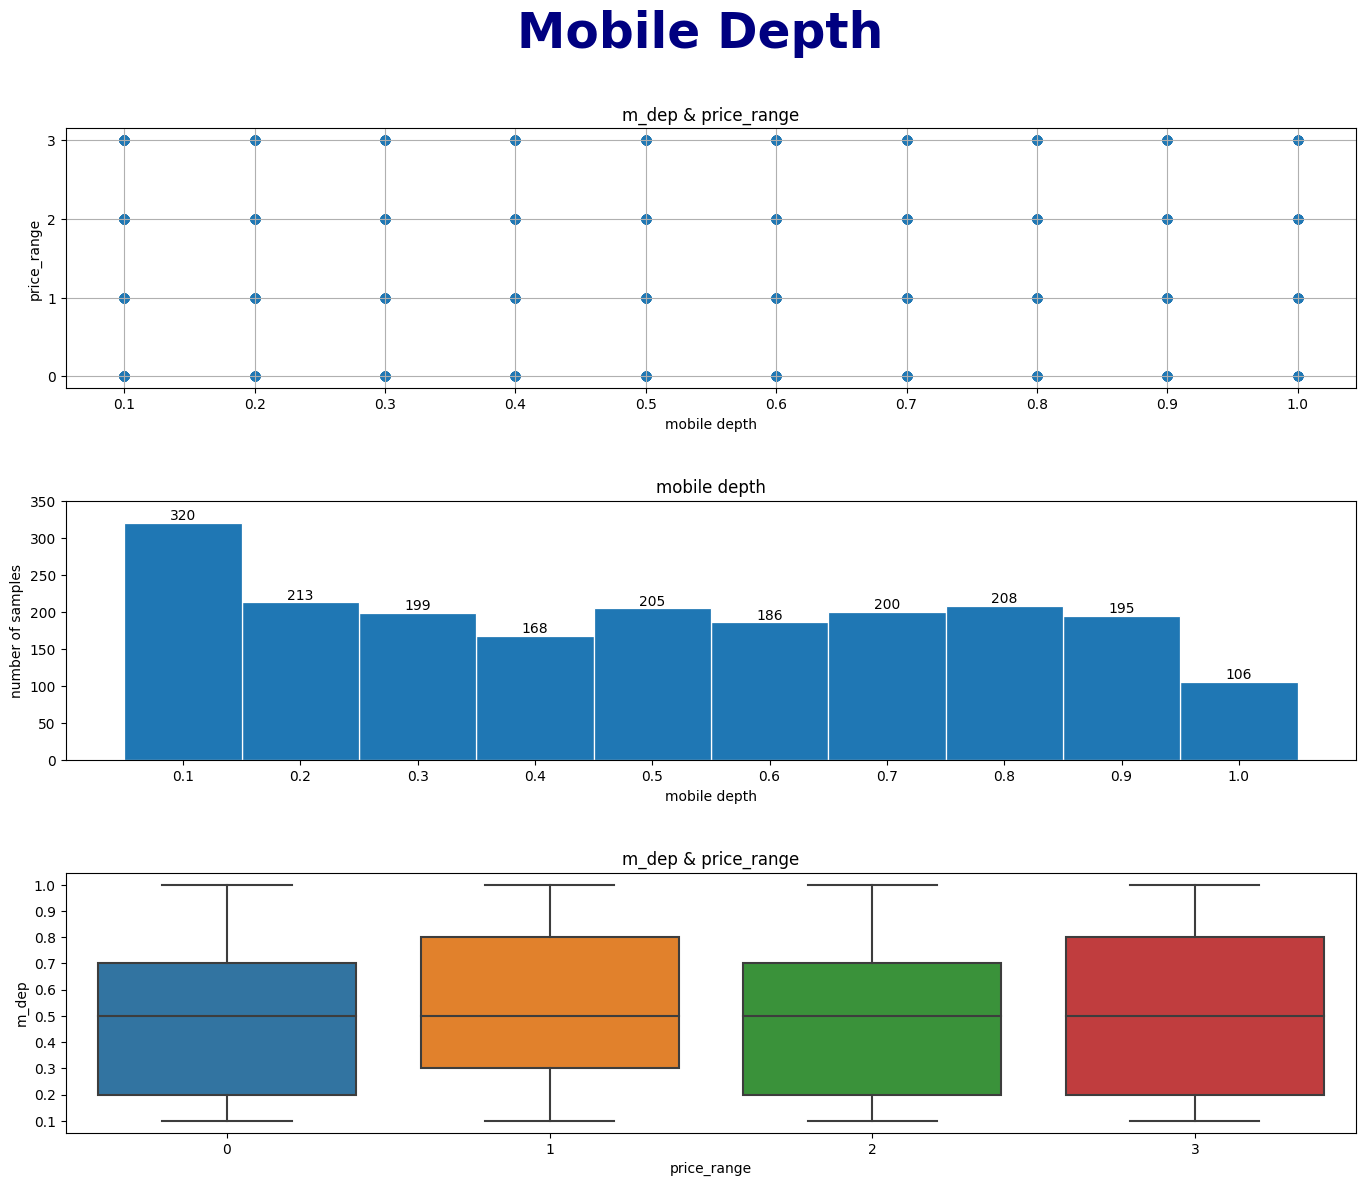

In [15]:
# Col 8 : m_dep

title = 'm_dep & price_range'

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Mobile Depth', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(Train.m_dep, Train.price_range)
ax1.set(title=title, xlabel='mobile depth', ylabel='price_range', xticks=np.arange(0.1, 1.1, 0.1), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = Train.m_dep.value_counts().sort_values().index
y = Train.m_dep.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.1, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='mobile depth', xlabel='mobile depth', ylabel='number of samples', xticks=np.arange(0.1, 1.1, 0.1), yticks=np.arange(0, 360, 50))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='m_dep', data=Train).set(title=title, yticks=np.arange(0.1, 1.1, 0.1))

plt.show()

### <font color='blue'> Result :  
    - Mobile depth feature is in [0.1, 1].  
    - There is no noise.  
    - The distribution of data in each price group is similar.  
    - Most of data (320 samples) have value of 0.1 . 
    - All the samples in each price_range group, have normal contributions.

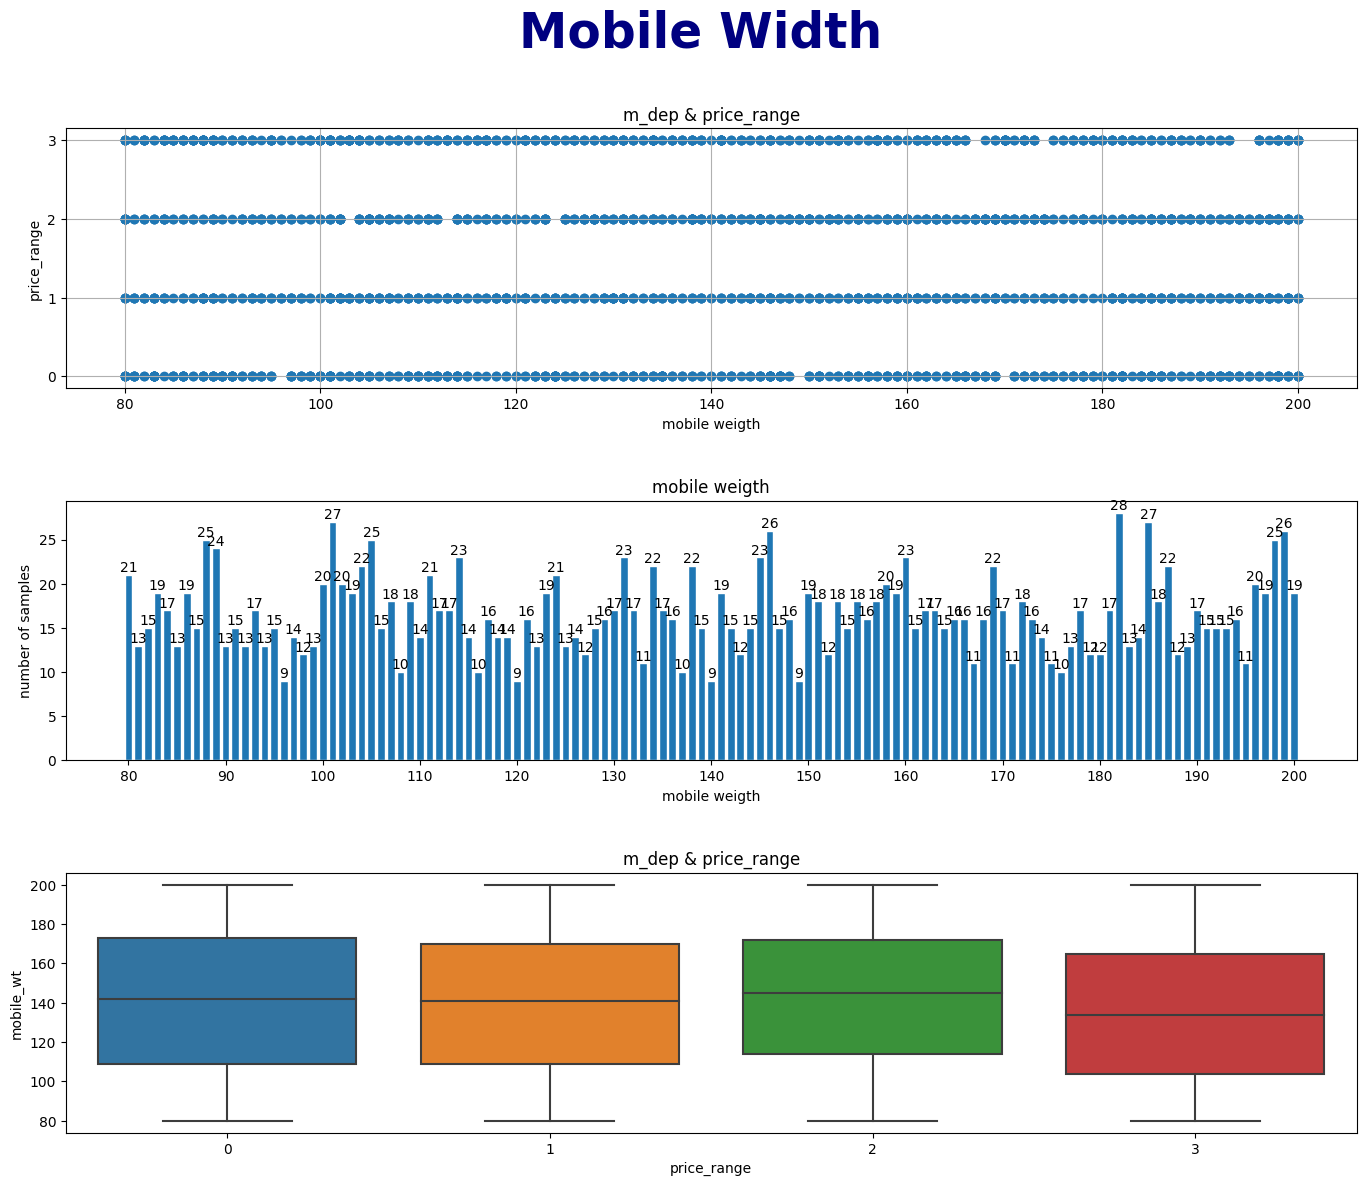

In [16]:
# Col 9 : m_wt

title = 'm_dep & price_range'

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Mobile Width', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(Train.mobile_wt, Train.price_range)
ax1.set(title=title, xlabel='mobile weigth', ylabel='price_range', xticks=np.arange(80, 201, 20), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = Train.mobile_wt.value_counts().sort_values().index
y = Train.mobile_wt.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.8, edgecolor="white", linewidth=1)
ax2.bar_label(bar_container)
ax2.set(title='mobile weigth', xlabel='mobile weigth', ylabel='number of samples', xticks=np.arange(80, 210, 10), yticks=np.arange(0, 30, 5))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='mobile_wt', data=Train).set(title=title, yticks=np.arange(80, 201, 20))

plt.show()

### <font color='blue'> Result :  
    - Mobile weight feature is in [80, 200].  
    - There is no noise.  
    - The distribution of data in each price group is similar.  
    - Most of data (28 samples) have value of 183 .  
    - Minimum frequency is 9 in values 96, 120, 140, 148.  
    - All the samples in each price_range group, have normal contributions.

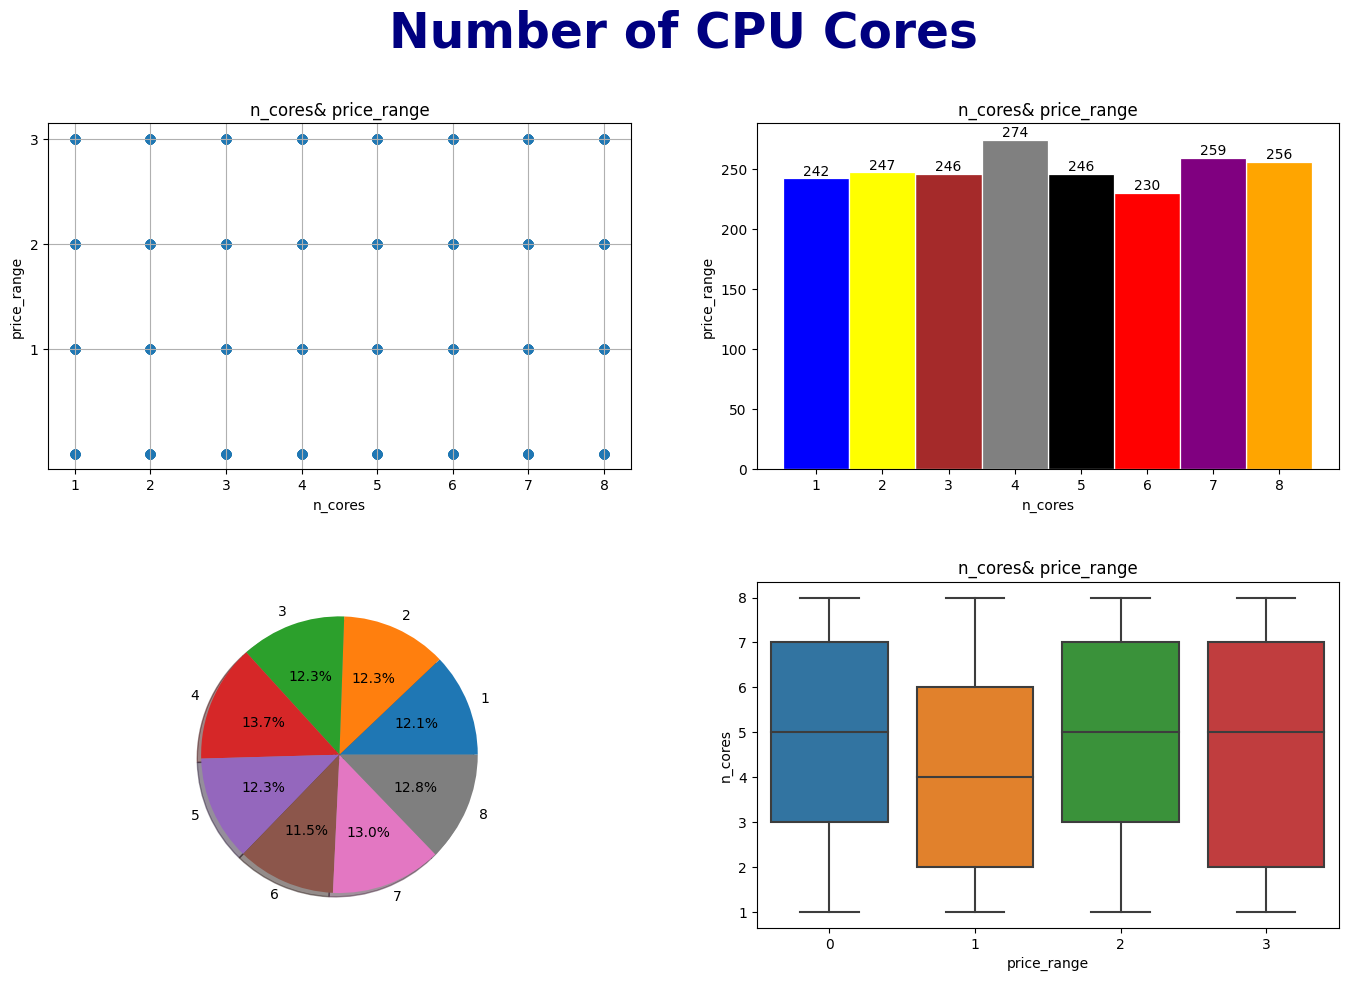

In [17]:
# Col 10 : n_cores               

title = 'n_cores& price_range'

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('Number of CPU Cores', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax[0, 0] ---> scatter
ax[0, 0].scatter(Train.n_cores, Train.price_range)
ax[0, 0].set(title=title, xlabel='n_cores', ylabel='price_range', xticks=np.arange(1, 9, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = Train.n_cores.value_counts().sort_values().index
y = Train.n_cores.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='n_cores', ylabel='price_range', xticks=np.arange(1, 9, 1))


# ax 3
d = Train[['n_cores']]
d = d.groupby('n_cores').size()
# labels = ['Dont has 4G', 'Has 4G']
# explode = (0, 0.1)
ax[1, 0].pie(d, labels=[1, 2, 3, 4, 5, 6, 7, 8], autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='n_cores', data=Train).set(title=title, yticks=np.arange(1, 9, 1))

plt.show()

### <font color='blue'> Result :  
    - Number of CPU cores feature is in range[1, 8].  
    - There is no noise.  
    - Maximum frequency is 274 samples with 4 cores(13.7 %).  
    - Minimum frequency is 230 samples with 6 cores(11.5 %).

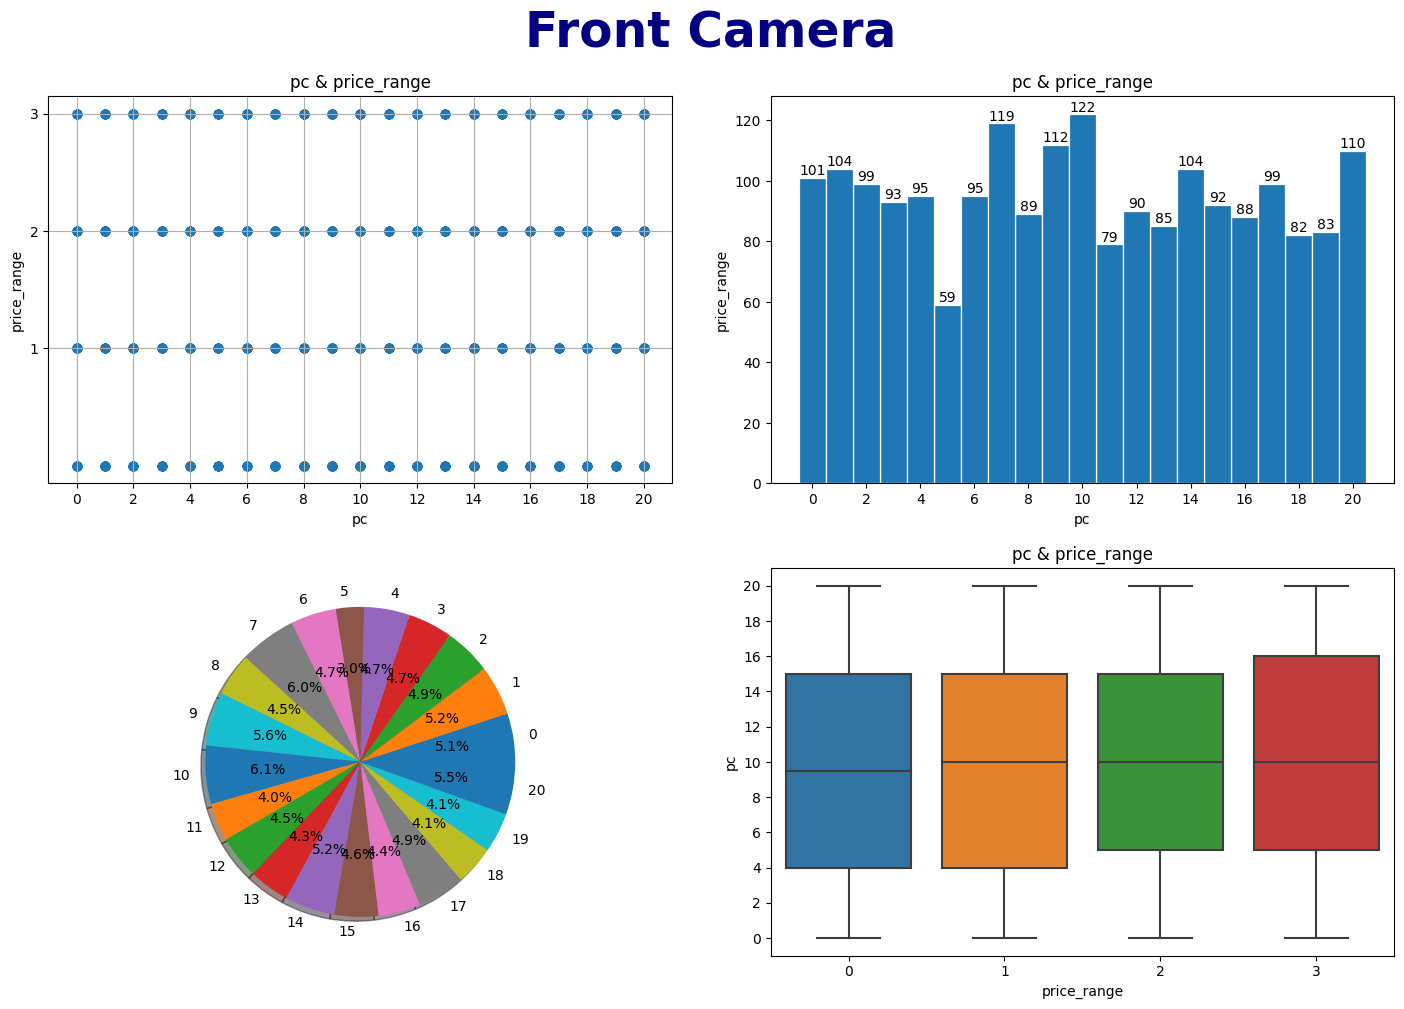

In [18]:
# Col 11 : pc               

title = 'pc & price_range'

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Front Camera', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(Train.pc, Train.price_range)
ax[0, 0].set(title=title, xlabel='pc', ylabel='price_range', xticks=np.arange(0, 21, 2), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = Train.pc.value_counts().sort_values().index
y = Train.pc.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='pc', ylabel='price_range', xticks=np.arange(0, 21, 2))


# ax 3
d = Train[['pc']]
d = d.groupby('pc').size()
# labels = ['Dont has 4G', 'Has 4G']
# explode = (0, 0.1)
ax[1, 0].pie(d, labels=np.arange(0, 21, 1), autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='pc', data=Train).set(title=title, yticks=np.arange(0, 21, 2))

plt.show()

### <font color='blue'> Result :  
    - Main camera feature is in range[1, 20].  
    - There is no noise.  
    - Maximum frequency is 59 samples with value=5 .  
    - Minimum frequency is 122 samples with 10 cores(6.1 %).

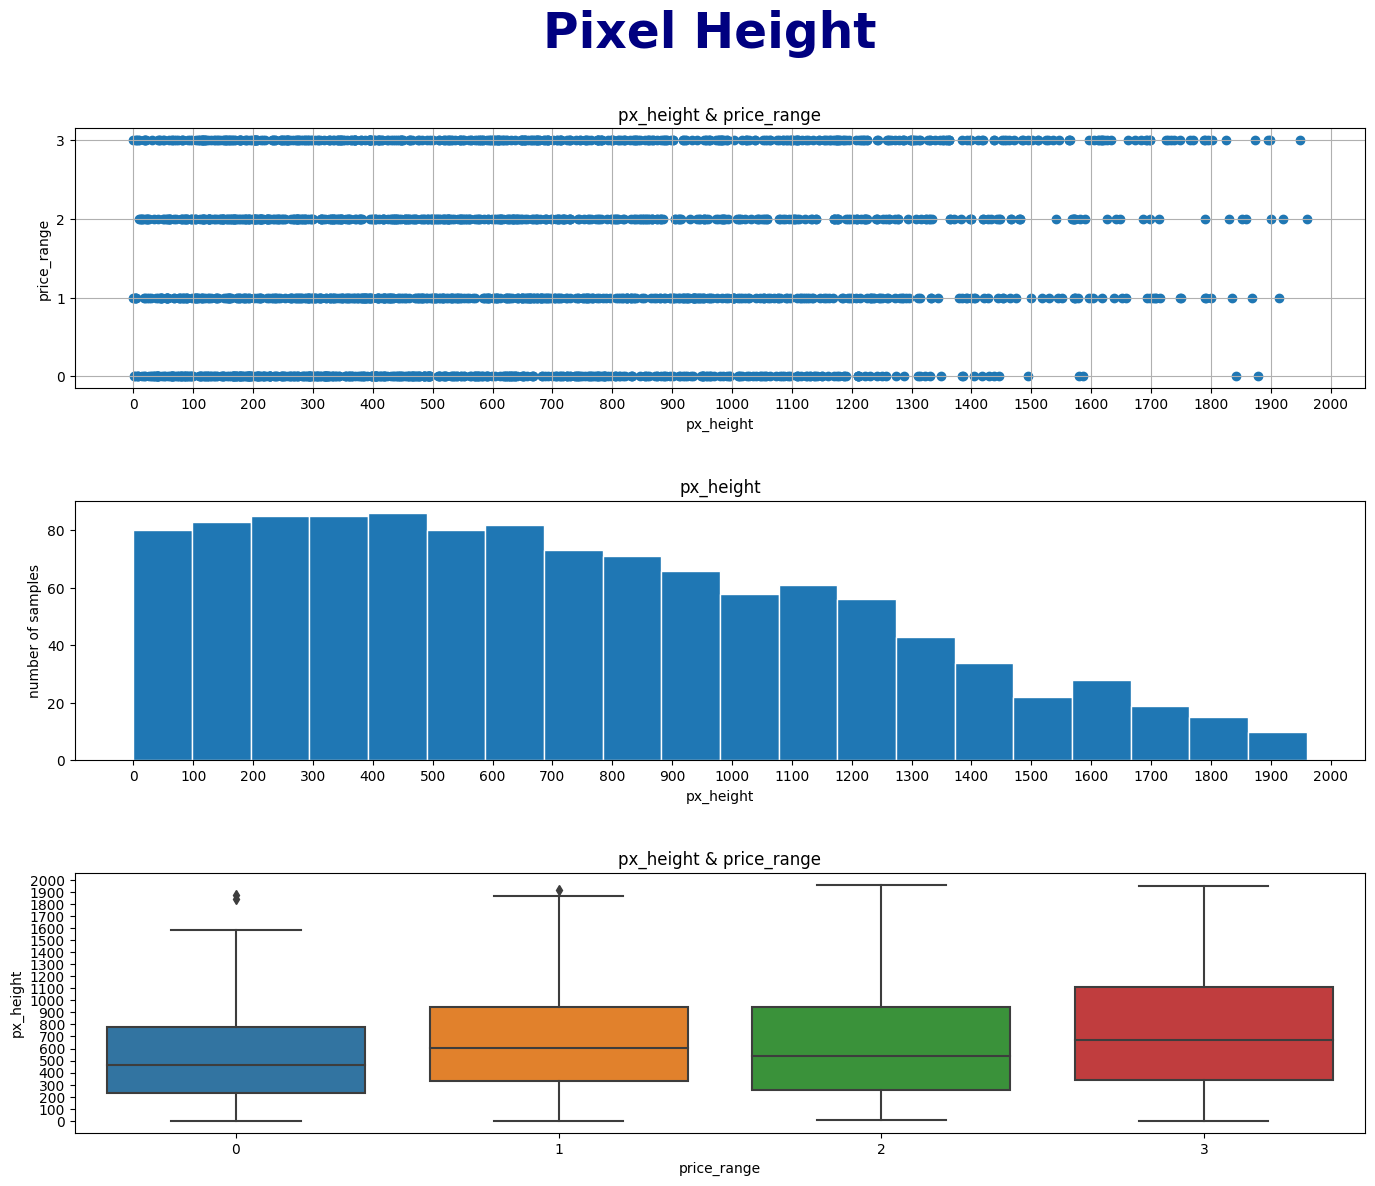

In [19]:
# Col 12 : px_height

title = 'px_height & price_range'

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Pixel Height', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(Train.px_height, Train.price_range)
ax1.set(title=title, xlabel='px_height', ylabel='price_range', xticks=np.arange(0, 2001, 100), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = Train.px_height.value_counts().sort_values().index
y = Train.px_height.value_counts().sort_values()
ax2.hist(x, edgecolor='white', bins=20)
ax2.set(title='px_height', xlabel='px_height', ylabel='number of samples', xticks=np.arange(0, 2001, 100))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='px_height', data=Train).set(title=title, yticks=np.arange(0, 2001, 100))

plt.show()

### <font color='blue'> Result :  
    - Pixel resolution height feature is in [0, 1960].  
    - There is no noise.  
    - The distribution of data in each price group is similar.  
    - Most of data (7 samples) have value of 347 .  
    - All the samples in each price_range group, have normal contributions.

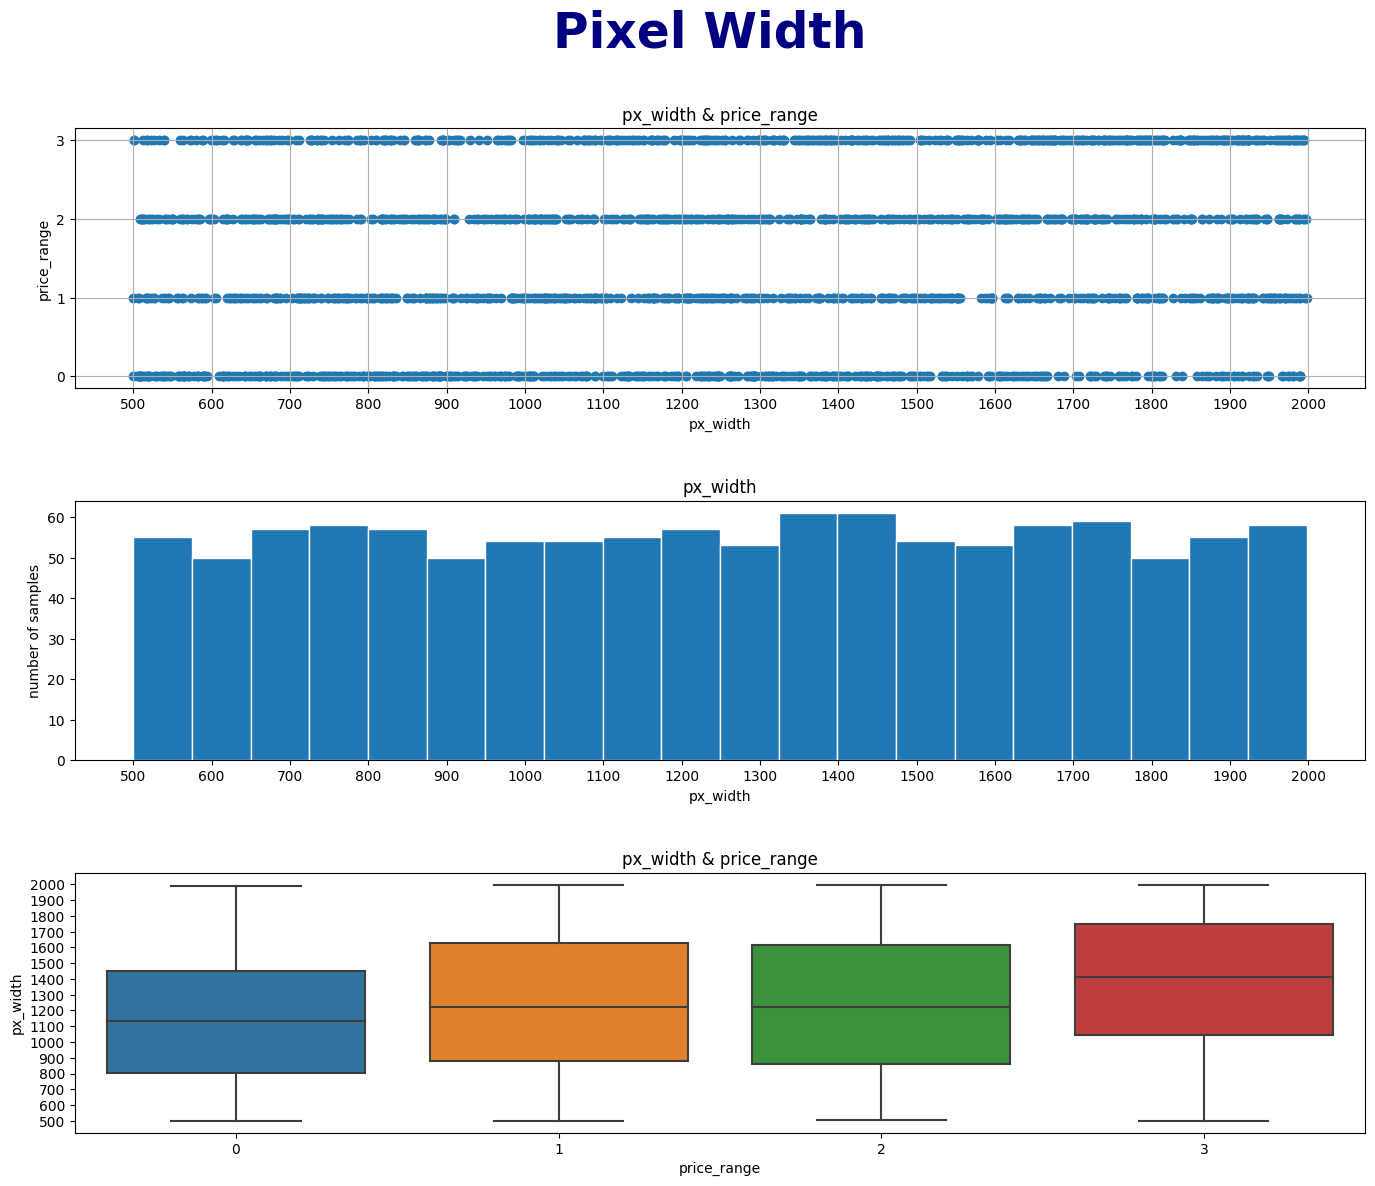

In [20]:
# Col 13 : px_width

title = 'px_width & price_range'

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Pixel Width', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(Train.px_width, Train.price_range)
ax1.set(title=title, xlabel='px_width', ylabel='price_range', xticks=np.arange(500, 2001, 100), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = Train.px_width.value_counts().sort_values().index
y = Train.px_width.value_counts().sort_values()
ax2.hist(x, edgecolor='white', bins=20)
ax2.set(title='px_width', xlabel='px_width', ylabel='number of samples', xticks=np.arange(500, 2001, 100))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='px_width', data=Train).set(title=title, yticks=np.arange(500, 2001, 100))

plt.show()

### <font color='blue'> Result :  
    - Pixel resolution width feature is in [500, 1998].  
    - There is no noise.  
    - The distribution of data in each price group is similar.  
    - Most of data (7 samples) have value of 874 .  
    - All the samples in each price_range group, have normal contributions.

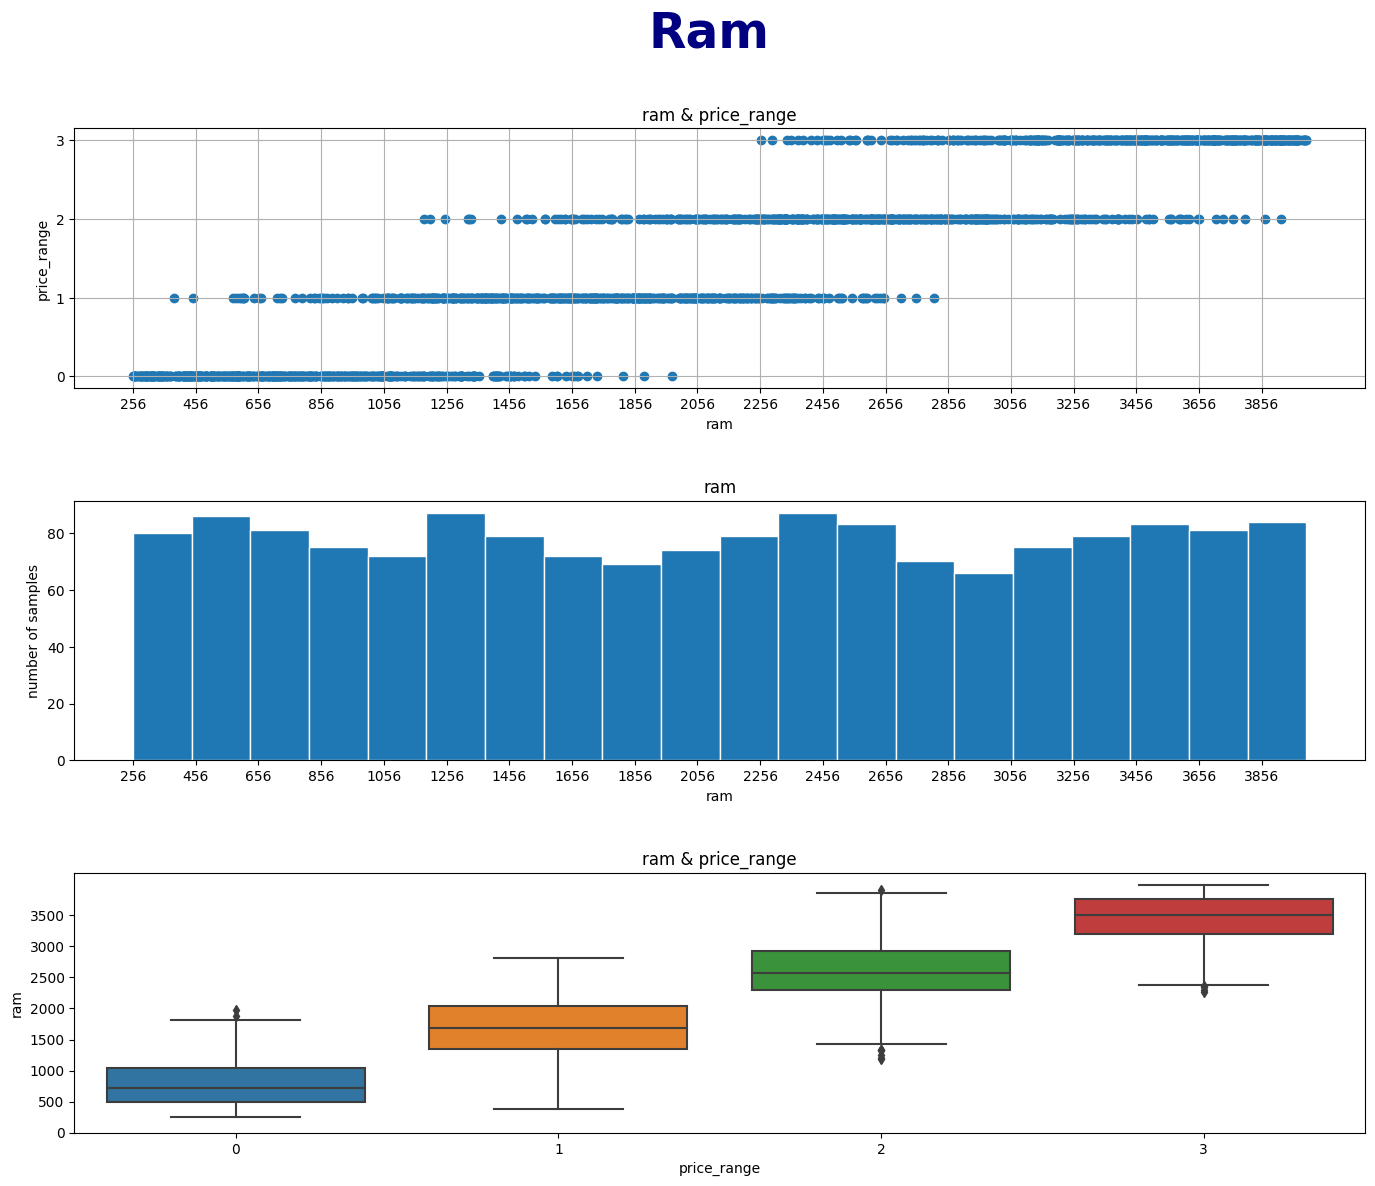

In [21]:
# Col 14 : ram

title = 'ram & price_range'

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Ram', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(Train.ram, Train.price_range)
ax1.set(title=title, xlabel='ram', ylabel='price_range', xticks=np.arange(256, 4000, 200), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = Train.ram.value_counts().sort_values().index
y = Train.ram.value_counts().sort_values()
ax2.hist(x, edgecolor='white', bins=20)
ax2.set(title='ram', xlabel='ram', ylabel='number of samples', xticks=np.arange(256, 4000, 200))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='ram', data=Train).set(title=title, yticks=np.arange(0, 4000, 500))

plt.show()

### <font color='blue'> Result :  
    - Pixel resolution width feature is in [256, 3998].  
    - There is no noise.  
    - If ram in [256, 1974] ---> price_range=0 (500 samples).  
    - If ram in [387, 2811] ---> price_range=1 (500 samples).  
    - If ram in [1185, 3916] ---> price_range=2 (500 samples).  
    - If ram in [2259, 3998] ---> price_range=3 (500 samples).   
    - All the samples in each price_range group, have normal contributions.

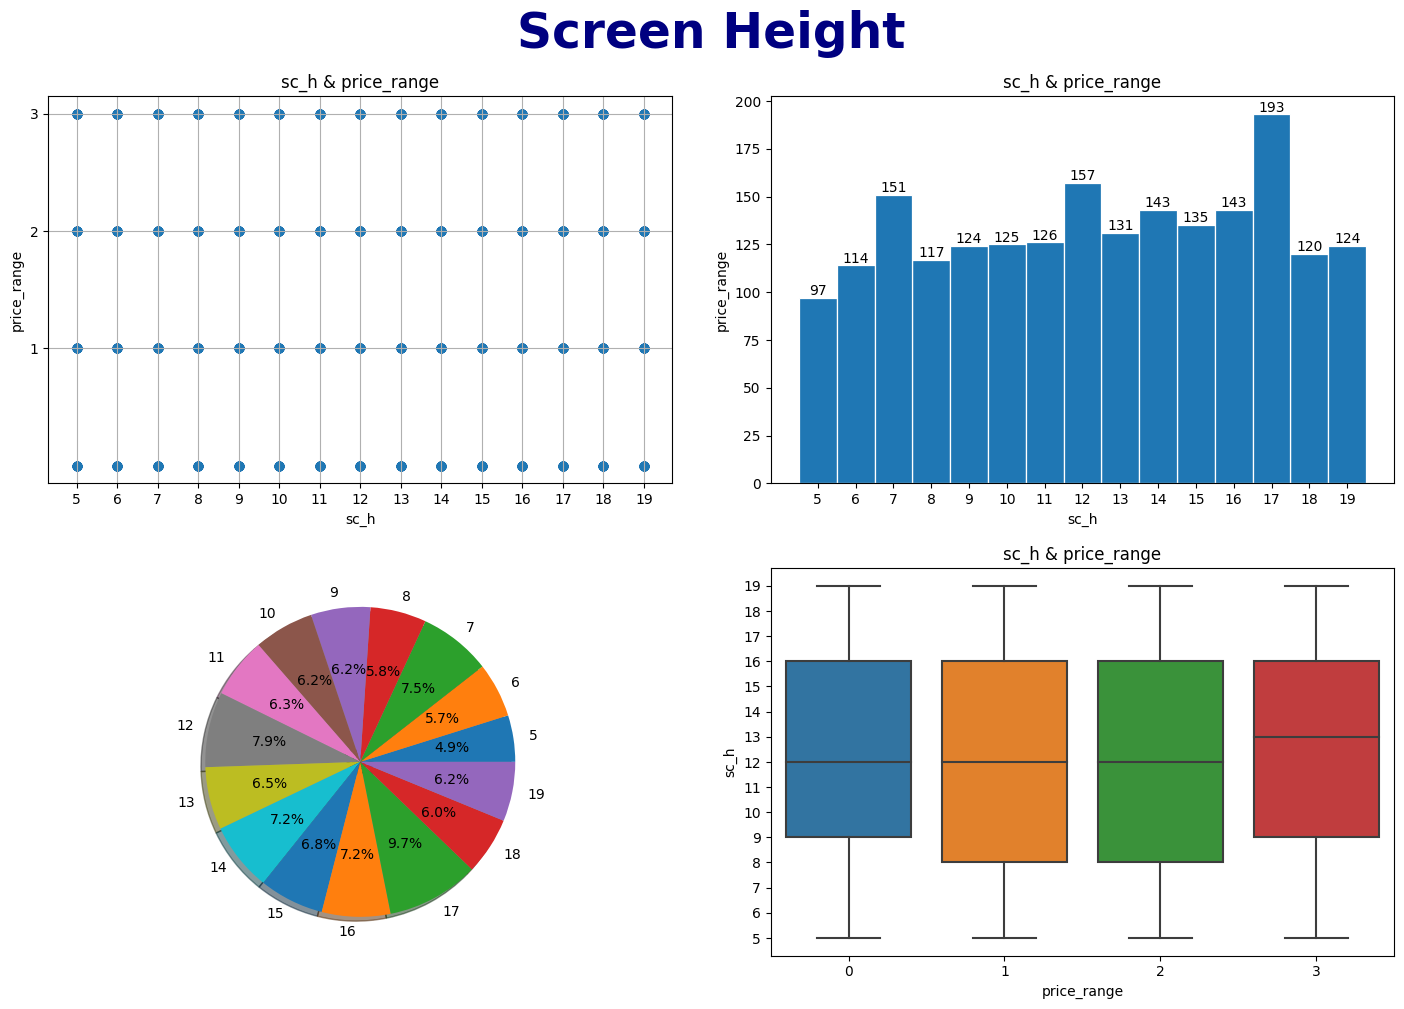

In [22]:
# Col 15 : sc_h               

title = 'sc_h & price_range'

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Screen Height', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(Train.sc_h, Train.price_range)
ax[0, 0].set(title=title, xlabel='sc_h', ylabel='price_range', xticks=np.arange(5, 20, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = Train.sc_h.value_counts().sort_values().index
y = Train.sc_h.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='sc_h', ylabel='price_range', xticks=np.arange(5, 20, 1))


# ax 3
d = Train[['sc_h']]
d = d.groupby('sc_h').size()
# labels = ['Dont has 4G', 'Has 4G']
# explode = (0, 0.1)
ax[1, 0].pie(d, labels=np.arange(5, 20, 1), autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='sc_h', data=Train).set(title=title, yticks=np.arange(5, 20, 1))

plt.show()

### <font color='blue'> Result :  
    - Screen height feature is in range[5, 19].  
    - There is no noise.  
    - Maximum frequency is 193 samples with value=17 (9.7%).  
    - Minimum frequency is 97 samples with value=5 (4.9 %).   
    - All the samples in each price_range group, have normal contributions.

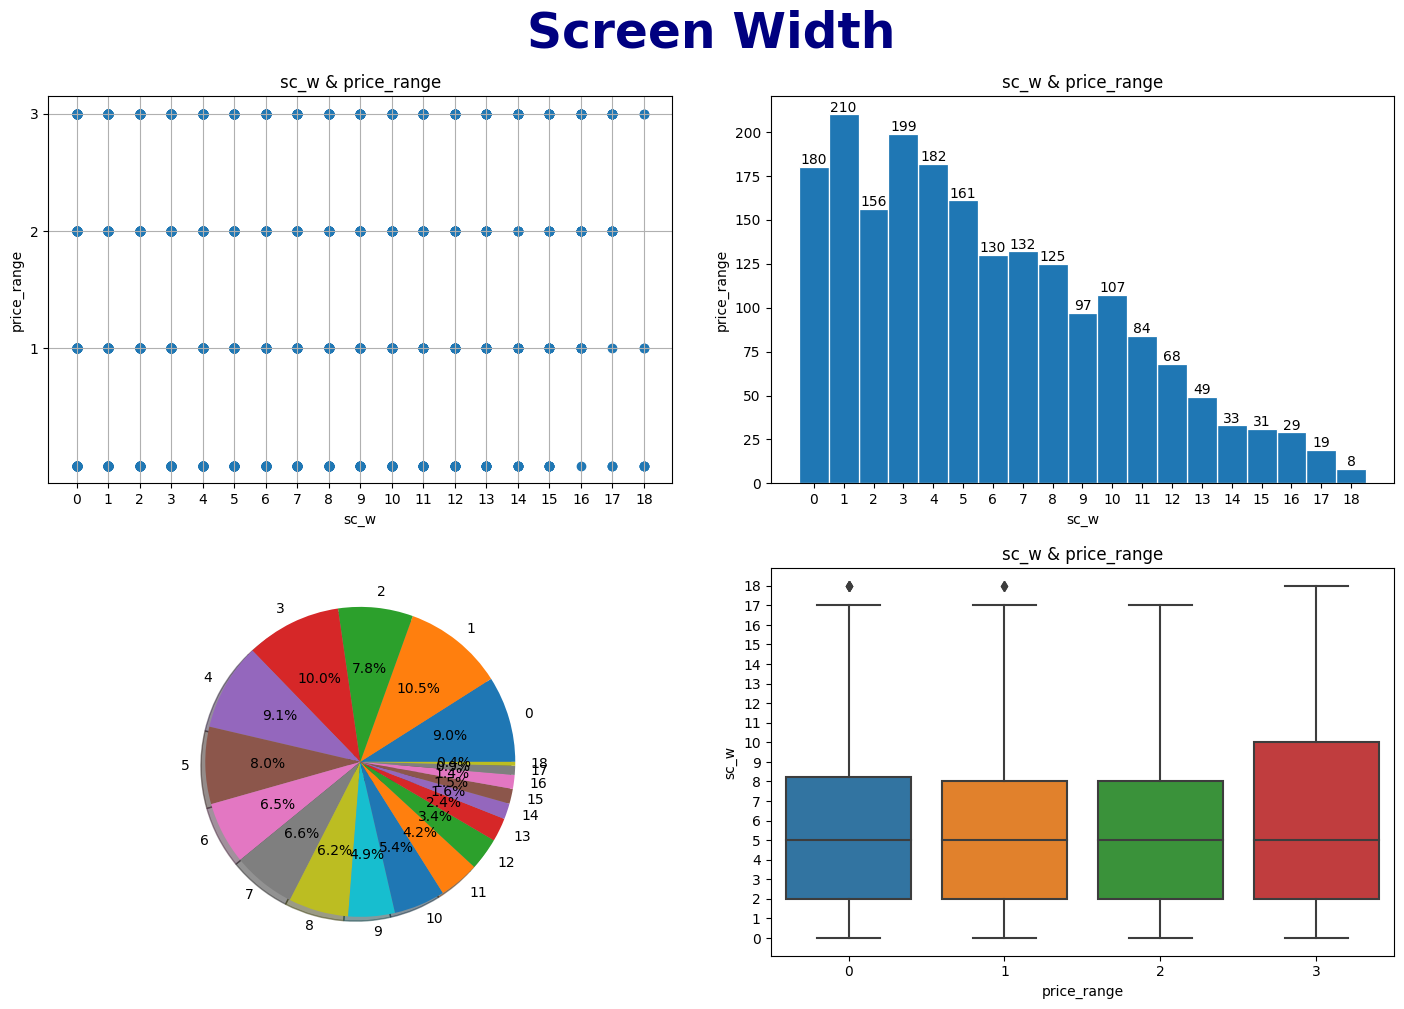

In [23]:
# Col 16 : sc_w               

title = 'sc_w & price_range'

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Screen Width', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(Train.sc_w, Train.price_range)
ax[0, 0].set(title=title, xlabel='sc_w', ylabel='price_range', xticks=np.arange(0, 19, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = Train.sc_w.value_counts().sort_values().index
y = Train.sc_w.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='sc_w', ylabel='price_range', xticks=np.arange(0, 19, 1))


# ax 3
d = Train[['sc_w']]
d = d.groupby('sc_w').size()
# labels = ['Dont has 4G', 'Has 4G']
# explode = (0, 0.1)
ax[1, 0].pie(d, labels=np.arange(0, 19, 1), autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='sc_w', data=Train).set(title=title, yticks=np.arange(0, 19, 1))

plt.show()

### <font color='blue'> Result :  
    - Screen width feature is in range[0, 18].  
    - There is no noise.  
    - Maximum frequency is 210 samples with value=1 (10.5 %).  
    - Minimum frequency is 8 samples with value=18.   
    - All the samples in each price_range group, have normal contributions.

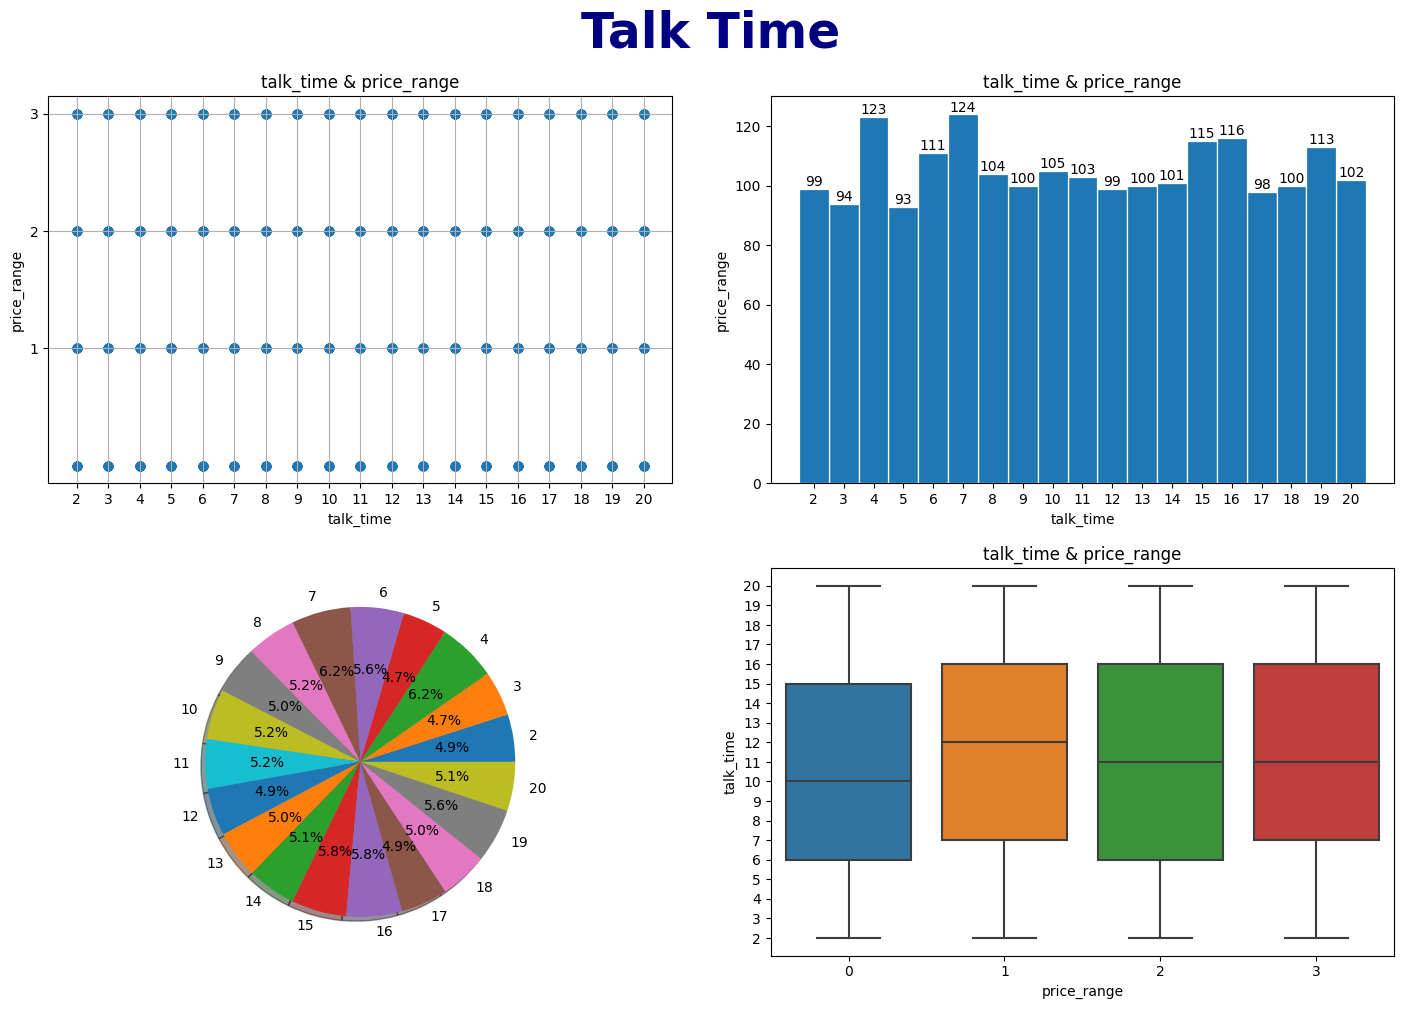

In [24]:
# Col 17 : talk_time               

title = 'talk_time & price_range'

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Talk Time', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(Train.talk_time, Train.price_range)
ax[0, 0].set(title=title, xlabel='talk_time', ylabel='price_range', xticks=np.arange(2, 21, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = Train.talk_time.value_counts().sort_values().index
y = Train.talk_time.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='talk_time', ylabel='price_range', xticks=np.arange(2, 21, 1))


# ax 3
d = Train[['talk_time']]
d = d.groupby('talk_time').size()
# labels = ['Dont has 4G', 'Has 4G']
# explode = (0, 0.1)
ax[1, 0].pie(d, labels=np.arange(2, 21, 1), autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='talk_time', data=Train).set(title=title, yticks=np.arange(2, 21, 1))

plt.show()

### <font color='blue'> Result :  
    - Talk time feature is in range[2, 20].  
    - There is no noise.  
    - Maximum frequency is 124 samples with value=7 (6.2 %).  
    - Minimum frequency is 93 samples with value=5 (4.7 %).   
    - All the samples in each price_range group, have normal contributions.

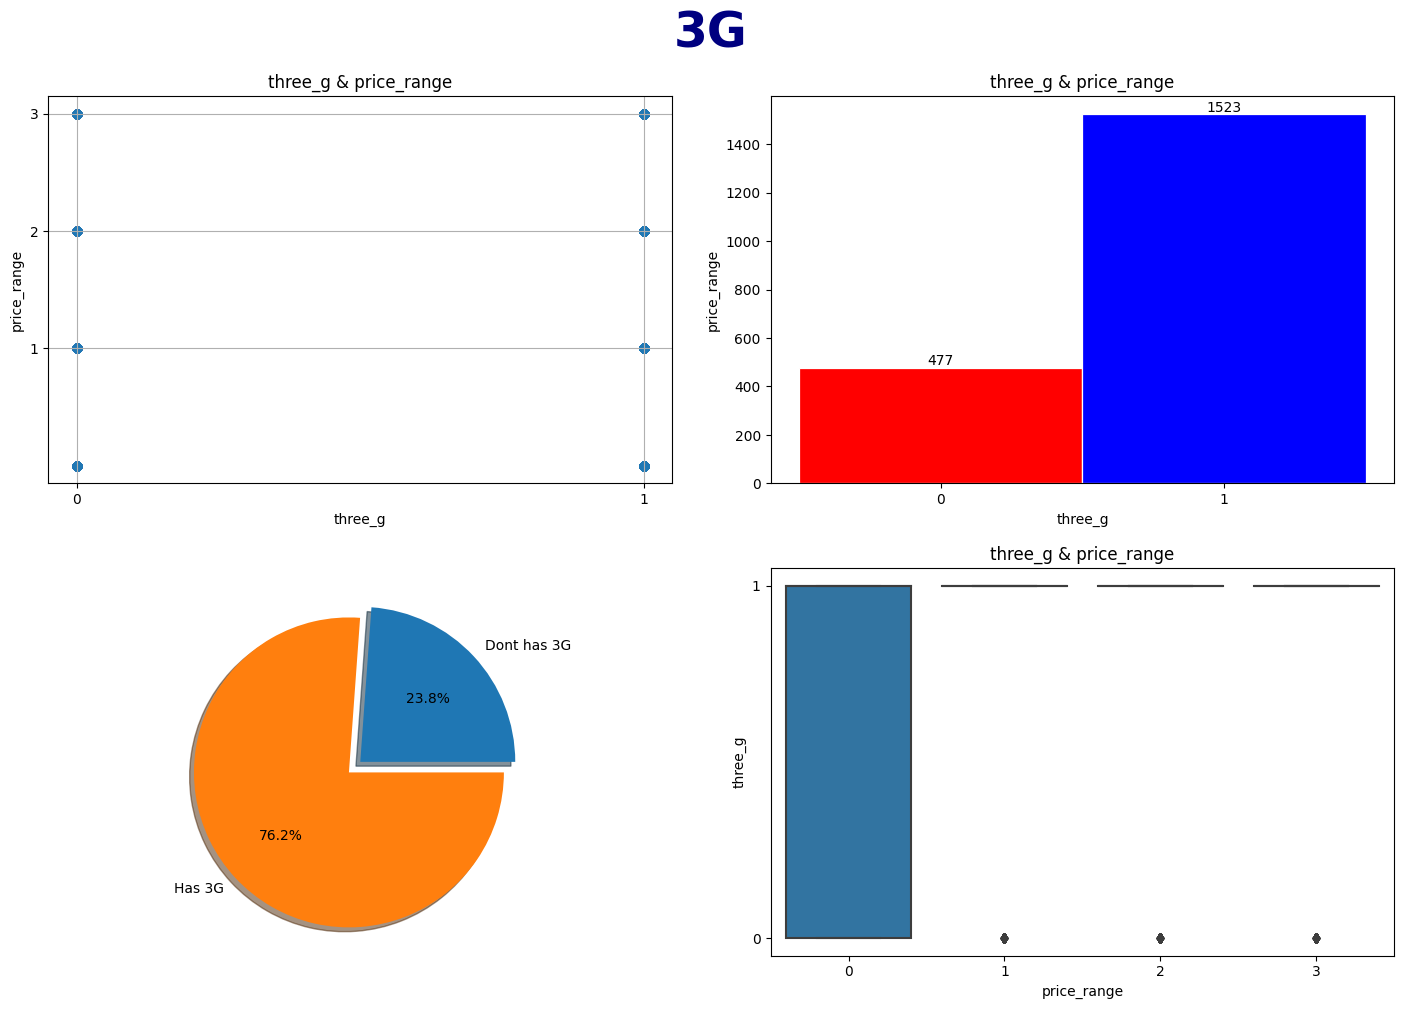

In [25]:
# Col 18 : three_g               

title = 'three_g & price_range'

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('3G', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(Train.three_g, Train.price_range)
ax[0, 0].set(title=title, xlabel='three_g', ylabel='price_range', xticks=np.arange(0, 2, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
c = ['red', 'blue']
x = Train.three_g.value_counts().sort_values().index
y = Train.three_g.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9, color=c)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='three_g', ylabel='price_range', xticks=np.arange(0, 2, 1))


# ax 3
d = Train[['three_g']]
d = d.groupby('three_g').size()
labels = ['Dont has 3G', 'Has 3G']
explode = (0, 0.1)
ax[1, 0].pie(d, autopct='%1.1f%%', shadow=True, labels=labels, explode=explode)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='three_g', data=Train).set(title=title, yticks=np.arange(0, 2, 1))

plt.show()

### <font color='blue'> Result :  
    - Talk time feature is boolean.  
    - There is no noise.  
    - 76.2 % of data (1523 samples) have 3G.  
    - 23.8% of data (447 samples) dont have 3G.  

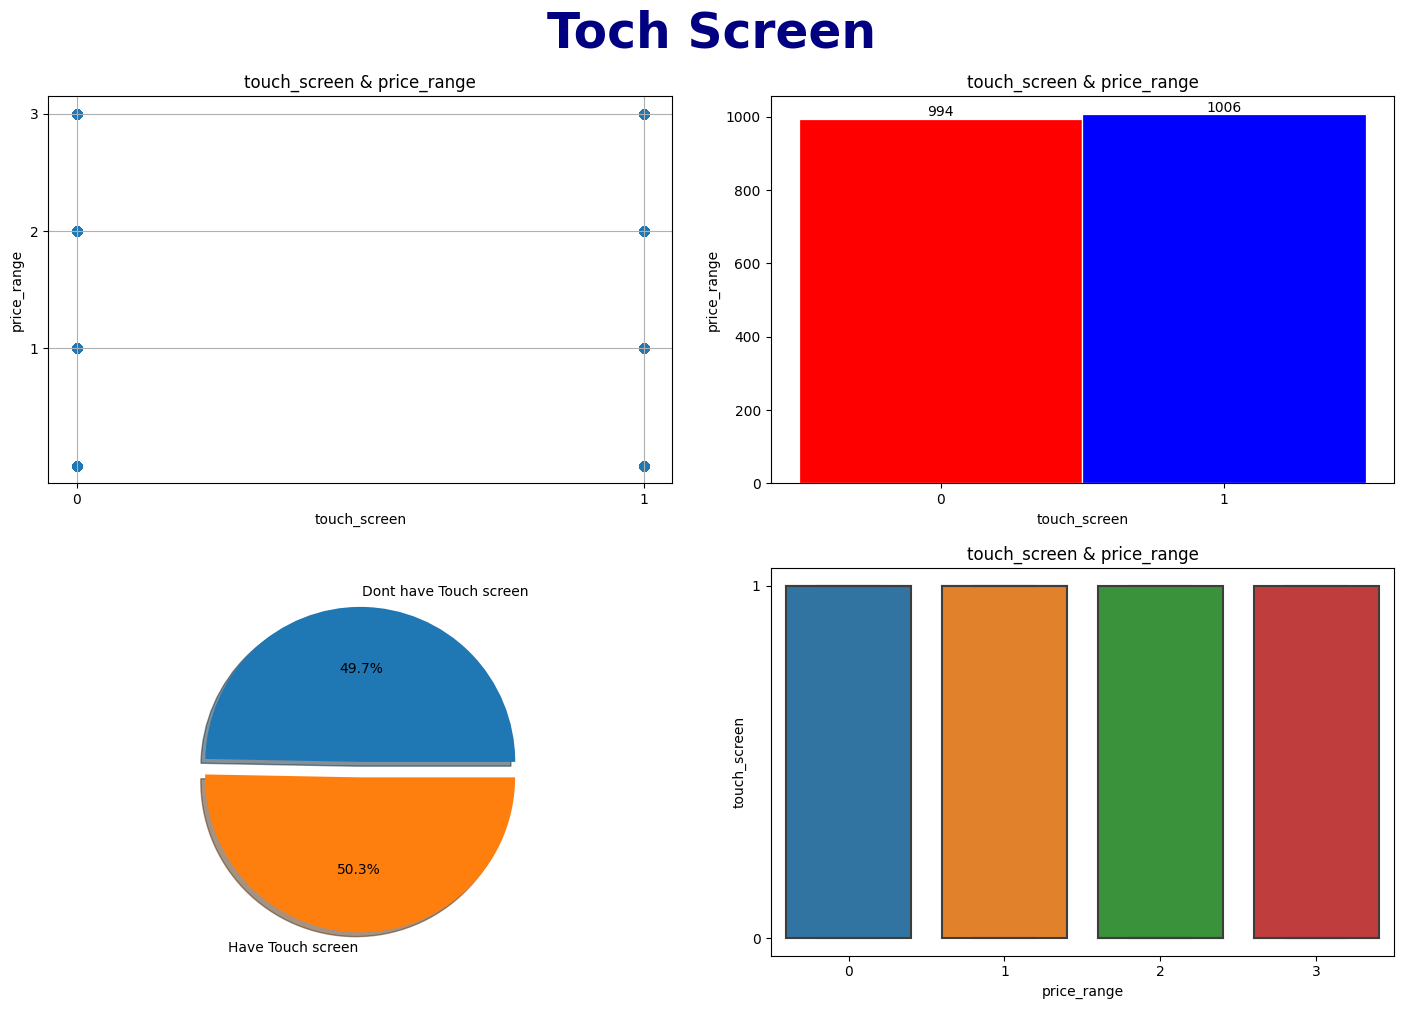

In [26]:
# Col 19 : touch_screen               

title = 'touch_screen & price_range'

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Toch Screen', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(Train.touch_screen, Train.price_range)
ax[0, 0].set(title=title, xlabel='touch_screen', ylabel='price_range', xticks=np.arange(0, 2, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
c = ['red', 'blue']
x = Train.touch_screen.value_counts().sort_values().index
y = Train.touch_screen.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9, color=c)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='touch_screen', ylabel='price_range', xticks=np.arange(0, 2, 1))


# ax 3
d = Train[['touch_screen']]
d = d.groupby('touch_screen').size()
labels = ['Dont have Touch screen', 'Have Touch screen']
explode = (0, 0.1)
ax[1, 0].pie(d, autopct='%1.1f%%', shadow=True, labels=labels, explode=explode)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='touch_screen', data=Train).set(title=title, yticks=np.arange(0, 2, 1))

plt.show()

### <font color='blue'> Result :  
    - Touch screen feature is boolean.  
    - There is no noise.  
    - 50.3 % of data (1006 samples) have Touch screen.  
    - 49.7 % of data (994 samples) dont have Touch screen.  

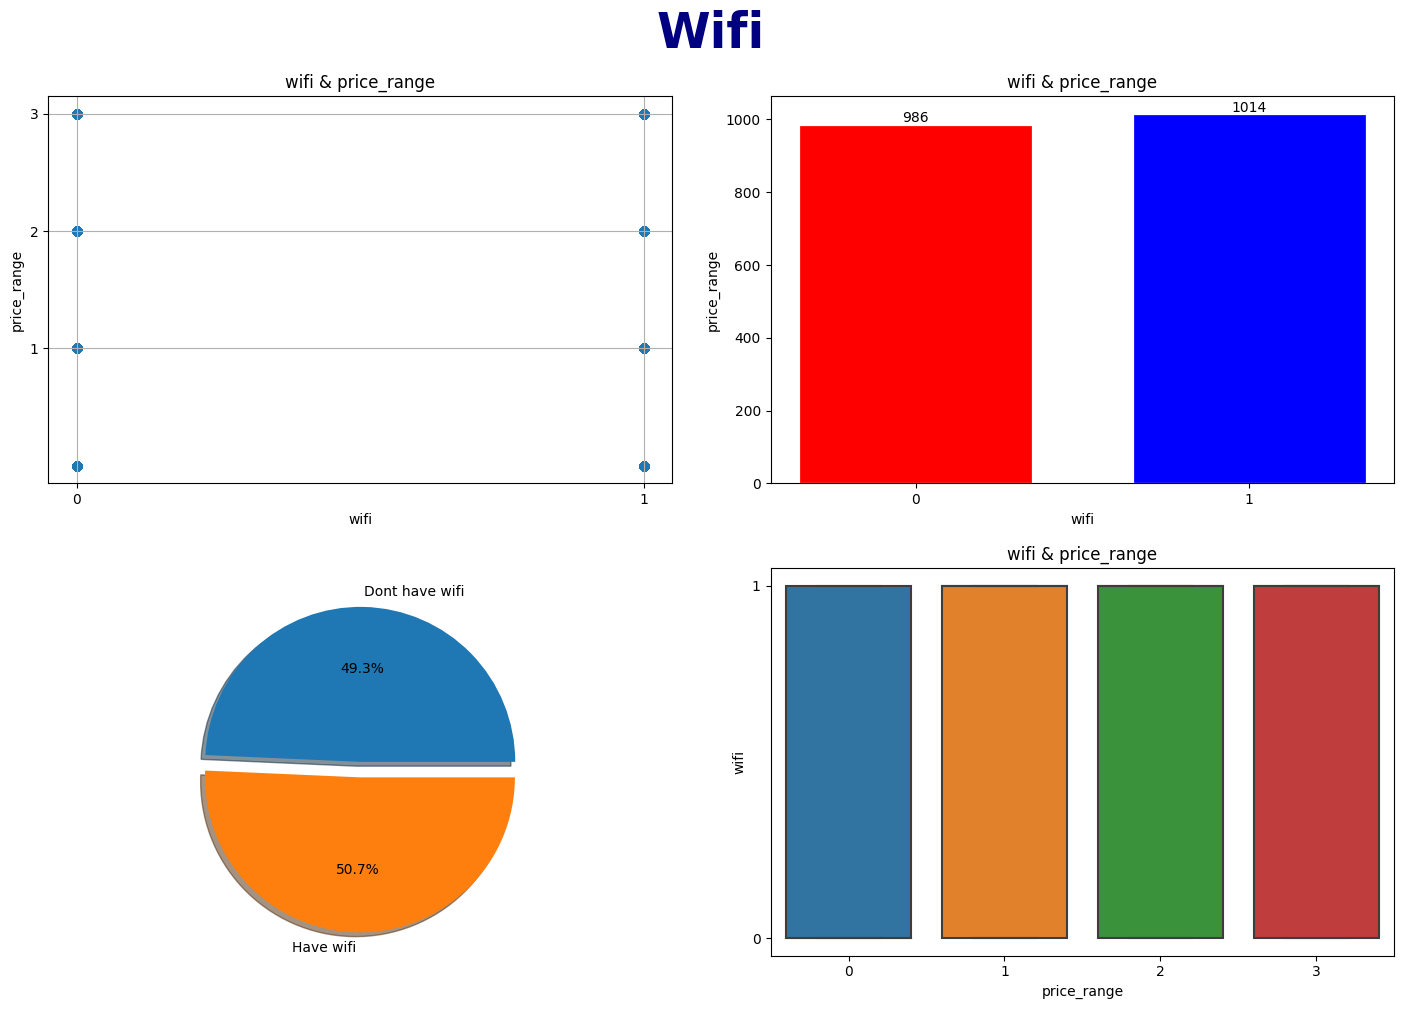

In [27]:
# Col 20 : wifi               

title = 'wifi & price_range'

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Wifi', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(Train.wifi, Train.price_range)
ax[0, 0].set(title=title, xlabel='wifi', ylabel='price_range', xticks=np.arange(0, 2, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
c = ['red', 'blue']
x = Train.wifi.value_counts().sort_values().index
y = Train.wifi.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=0.7, edgecolor="white", linewidth=0.9, color=c)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='wifi', ylabel='price_range', xticks=np.arange(0, 2, 1))


# ax 3
d = Train[['wifi']]
d = d.groupby('wifi').size()
labels = ['Dont have wifi', 'Have wifi']
explode = (0, 0.1)
ax[1, 0].pie(d, autopct='%1.1f%%', shadow=True, labels=labels, explode=explode)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='wifi', data=Train).set(title=title, yticks=np.arange(0, 2, 1))

plt.show()

### <font color='blue'> Result :  
    - wifi feature is boolean.  
    - There is no noise.  
    - 50.7 % of data (1014 samples) have Touch screen.  
    - 49.3 % of data (986 samples) dont have Touch screen.  

## Compaire Train and Test columns :

In [28]:
print(Train.columns)
print("_"*45)
print("number of Train columns : ", len(Train.columns))

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
_____________________________________________
number of Train columns :  21


In [29]:
print(Test.columns)
print("_"*45)
print("number of Test columns : ", len(Test.columns))

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
_____________________________________________
number of Test columns :  21


In [30]:
Test.drop(columns='id', inplace=True)

## <font color='red'> Normalizeation :

In [31]:
# Create a DataFrame with Train and Test
# Total[ : 2000]---> Train
# Total[2000 : ]---> Test
Target = Train.price_range
Train.drop(columns='price_range', inplace=True)

Total = pd.concat([Train, Test], ignore_index=True)
Total

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
2996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
2997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
2998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [32]:
Total.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [33]:
Train.columns == Test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [34]:
columns = Train.columns

In [35]:
# Normalize
scaler = preprocessing.MinMaxScaler(feature_range=(2, 3))
# Fit data to normalization
Norm = scaler.fit_transform(Total)
# Convert normalized data to a DataFrame
Normalized = pd.DataFrame(Norm, columns=columns)
Normalized.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.494896,2.502000,2.411387,2.512000,2.231789,2.510000,2.493253,2.452222,2.500025,2.493762,2.498117,2.326078,2.499067,2.500572,2.514476,2.312037,2.501981,2.759667,2.502000,2.507000
std,0.291570,0.500079,0.328143,0.499939,0.230723,0.499983,0.292787,0.317743,0.293448,0.327052,0.303696,0.224593,0.290164,0.290137,0.303654,0.240139,0.304133,0.427357,0.500079,0.500034
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,2.242662,2.000000,2.080000,2.000000,2.052632,2.000000,2.225806,2.111111,2.241667,2.142857,2.250000,2.141709,2.243658,2.255679,2.285714,2.111111,2.222222,3.000000,2.000000,2.000000
50%,2.488326,3.000000,2.400000,3.000000,2.157895,3.000000,2.500000,2.444444,2.500000,2.428571,2.500000,2.287755,2.499332,2.505478,2.500000,2.277778,2.500000,3.000000,3.000000,3.000000
75%,2.746498,3.000000,2.720000,3.000000,2.368421,3.000000,2.741935,2.777778,2.750000,2.714286,2.750000,2.475765,2.757009,2.750735,2.785714,2.500000,2.777778,3.000000,3.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [36]:
Train2 = Normalized[ : 2000]
Test2 = Normalized[2000 : ]

In [37]:
len(columns)

20

In [38]:
# Add Target column to Train2
Train2.insert(20, 'price_range', Target)
Train2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,2.228152,2.0,2.68,2.0,2.052632,2.0,2.080645,2.555556,2.900000,2.142857,...,2.010204,2.170895,2.612774,2.285714,2.388889,2.944444,2.0,2.0,3.0,1
1,2.347565,3.0,2.00,3.0,2.000000,3.0,2.822581,2.666667,2.466667,2.285714,...,2.461735,2.993324,2.634687,2.857143,2.166667,2.277778,3.0,3.0,2.0,2
2,2.042028,3.0,2.00,3.0,2.105263,3.0,2.629032,2.888889,2.541667,2.571429,...,2.644388,2.811749,2.627205,2.428571,2.111111,2.388889,3.0,3.0,2.0,2
3,2.076718,3.0,2.80,2.0,2.000000,2.0,2.129032,2.777778,2.425000,2.714286,...,2.620408,2.858478,2.671566,2.785714,2.444444,2.500000,3.0,2.0,2.0,2
4,2.881254,3.0,2.28,2.0,2.684211,3.0,2.677419,2.555556,2.508333,2.142857,...,2.616327,2.475300,2.308658,2.214286,2.111111,2.722222,3.0,3.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.196131,3.0,2.00,3.0,2.000000,3.0,2.000000,2.777778,2.216667,2.714286,...,2.623469,2.927904,2.110102,2.571429,2.222222,2.944444,3.0,3.0,2.0,0
1996,2.977318,3.0,2.84,3.0,2.000000,2.0,2.596774,2.111111,2.891667,2.428571,...,2.466837,2.977971,2.474613,2.428571,2.555556,2.777778,3.0,3.0,3.0,2
1997,2.941294,2.0,2.16,3.0,2.052632,3.0,2.548387,2.666667,2.233333,3.000000,...,2.442857,2.755674,2.748530,2.285714,2.055556,2.166667,3.0,3.0,2.0,3
1998,2.675117,2.0,2.16,2.0,2.210526,3.0,2.709677,2.000000,2.541667,2.571429,...,2.171429,2.113485,2.163816,2.928571,2.555556,2.944444,3.0,3.0,3.0,0


# <font color='red'> Modeling  :

In [39]:
# Define a function to return X, y
def Xy(dataframe) :
    global X, y
    X = dataframe.drop(columns='price_range')
    y = dataframe.price_range.values.reshape(-1, 1)

### <font color='blue'> 1) DTs

In [40]:
# Find parameters for DTs :
def DTs_finder(dataframe) :
    
    global best_criterion, best_max_depth
    
    best_criterion = ''
    best_test_size = 0
    best_max_depth = 0   
    best_accuracy = 0
    
    
    
    t1 = datetime.datetime.now()
    
    max_depthes = list(np.arange(2, 21))
    max_depthes.append(None)
    
    # Use Xy function to generate X, y
    Xy(dataframe)
    
    # TestSize
    for i in range(0, 8) :
        tester = round(0.1 + (0.05*i), 2)
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=tester, random_state=0)
    
        # Criterion
        for cr in ['gini', 'entropy'] :

            # max_depth
            for md in max_depthes :
                DTs = DecisionTreeClassifier(criterion=cr, max_depth=md)
                DTs.fit(x_train, y_train)
                y_pred = DTs.predict(x_test)
                accuracy = metrics.accuracy_score(y_test, y_pred)

                if accuracy > best_accuracy :
                    best_accuracy = accuracy
                    best_criterion = cr
                    best_test_size =  tester
                    best_max_depth = md

    t2 = datetime.datetime.now()
    delta = t2 - t1
    
    print(red('Time to calculate = {}'.format(delta), 'bold'))
    print("_"*50)
    print(green('best_accuracy = {}'.format(best_accuracy), 'bold'))
    print(green('best_test_size = {}'.format(best_test_size), 'bold'))
    print("_"*50)
    print(blue('criterion = {}'.format(best_criterion), 'bold'))
    print(blue('best_max_depth = {}'.format(best_max_depth), 'bold'))

In [41]:
DTs_finder(Train2)

Time to calculate = 0:00:05.047774
__________________________________________________
best_accuracy = 0.88
best_test_size = 0.1
__________________________________________________
criterion = gini
best_max_depth = None


In [42]:
# Make use of whole Train2 as x_train and y_train
x_train = Train2.drop(columns='price_range')
y_train = Train2.price_range.values.reshape(-1, 1)

# Use whole Test as x_test
x_test = Test2

# y_test is result 

In [43]:
DTs = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth)
DTs.fit(x_train, y_train)
Result_DTs = DTs.predict(Test2)
Result_DTs

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 1, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 1, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 1, 0, 2, 0, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 3, 3, 2, 0, 2,
       1, 1, 3, 0, 1, 0, 3, 2, 1, 2, 1, 3, 3, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 1, 2, 0, 3,
       2, 2, 3, 0, 0, 1, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 2, 2, 1, 2,
       3, 3, 3, 1, 1, 0, 2, 2, 2, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 3, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

## <font color='red'> Result_DTs is result for DecissionTree algorithm

### <font color='blue'> 2) RF

In [44]:
# Find best parameters for RF :
def RF_finder(dataframe) :
    
    global best_criterion, best_max_depth, best_bootstrap, best_n_estimator
    
    t1 = datetime.datetime.now()
    criterion = ''
    best_test_size = 0
    best_max_depth = 0   
    best_accuracy = 0
    best_n_estimator = 0
    best_bootstrap= bool
    
    
    max_depthes = list(np.arange(10, 30))
    max_depthes.append(None)
    
    
    # Use Xy function to generate X, y
    Xy(dataframe)
    
    # TestSize
    for i in range(0, 8) :
        tester = round(0.1 + (0.05*i), 2)
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=tester, random_state=0)
    
        # Criterion
        for cr in ['gini', 'entropy'] :

            # Bootstrap
            for bt in [True, False] :

                # max_depth
                for md in max_depthes :

                    # n_stimator
                    for ns in [100, 200, 300, 400, 500] :

                            RF = RandomForestClassifier(criterion=cr, bootstrap=bt,
                                                        max_depth=md, n_estimators=ns, random_state=0)
                            RF.fit(x_train, y_train)
                            y_pred = RF.predict(x_test)
                            accuracy = metrics.accuracy_score(y_test, y_pred)

                            if accuracy > best_accuracy :
                                best_bootstrap = bt
                                best_accuracy = accuracy
                                best_criterion = cr
                                best_test_size =  tester
                                best_max_depth = md
                                best_n_estimator = ns

    t2 = datetime.datetime.now()
    delta = t2 - t1
    
    print(red('Time to calculate = {}'.format(delta), 'bold'))
    print("_"*50)
    print(green('best_accuracy = {}'.format(best_accuracy), 'bold'))
    print(green('best_test_size = {}'.format(best_test_size), 'bold'))  
    print("_"*50)
    print(blue('criterion = {}'.format(best_criterion), 'bold'))
    print(blue('best_max_depth = {}'.format(best_max_depth), 'bold'))
    print(blue('best_n_estimator = {}'.format(best_n_estimator), 'bold'))
    print(blue('best_bootstrap = {}'.format(best_bootstrap), 'bold'))

In [45]:
RF_finder(Train2)

Time to calculate = 1:03:55.536289
__________________________________________________
best_accuracy = 0.9133333333333333
best_test_size = 0.15
__________________________________________________
criterion = entropy
best_max_depth = 17
best_n_estimator = 100
best_bootstrap = True


In [46]:
# Make use of whole Train2 as x_train and y_train
x_train = Train2.drop(columns='price_range')
y_train = Train2.price_range.values.reshape(-1, 1)

# Use whole Test as x_test
x_test = Test2

# y_test is result 

In [47]:
RF = RandomForestClassifier(criterion=best_criterion, bootstrap=best_bootstrap, max_depth=best_max_depth, n_estimators=best_n_estimator)
RF.fit(x_train, y_train)
Result_RF = RF.predict(Test2)
Result_RF

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 2, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       1, 3, 1, 1, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 3, 3, 1, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

## <font color='red'> Result_RF is result for RandomForest algorithm

### <font color='blue'> 3) SVM

In [48]:
# Find best parameters for SVM :
def SVM_finder(dataframe) :
      
    global best_kernel, best_gamma
    
    best_accuracy = 0
    t1 = datetime.datetime.now()
        
    # Use Xy function to generate X, y
    Xy(dataframe)
    
    # TestSize
    for i in range(0, 8) :
        tester = round(0.1 + (0.05*i), 2)
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=tester, random_state=0)
        
        # Kernel
        for kr in ['linear', 'poly', 'rbf', 'sigmoid'] :

            # Gamma
            for gm in ['scale', 'auto'] :

                clf = SVC(kernel=kr, gamma=gm)
                clf.fit(x_train, y_train)
                y_pred = clf.predict(x_test)
                accuracy = metrics.accuracy_score(y_test, y_pred)

                if accuracy > best_accuracy :
                    best_kernel = kr
                    best_gamma = gm
                    best_accuracy = accuracy
                    best_test_size =  tester
                    
    t2 = datetime.datetime.now()
    delta = t2 - t1
    
    print(red('Time to calculate = {}'.format(delta), 'bold'))
    print("_"*50)
    print(green('best_accuracy = {}'.format(best_accuracy), 'bold'))
    print(green('best_test_size = {}'.format(tester), 'bold'))
    print("_"*50)    
    print(blue('Kernel = {}'.format(best_kernel), 'bold'))
    print(blue('best_gamma = {}'.format(best_gamma), 'bold'))

In [49]:
SVM_finder(Train2)

Time to calculate = 0:00:05.740727
__________________________________________________
best_accuracy = 0.955
best_test_size = 0.45
__________________________________________________
Kernel = linear
best_gamma = scale


In [50]:
# Make use of whole Train2 as x_train and y_train
x_train = Train2.drop(columns='price_range')
y_train = Train2.price_range.values.reshape(-1, 1)

# Use whole Test as x_test
x_test = Test2

# y_test is result 

In [51]:
SVM = SVC(kernel=best_kernel, gamma=best_gamma)
SVM.fit(x_train, y_train)
Result_SVM = SVM.predict(Test2)
Result_SVM

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,



## <font color='red'> Result_SVM is result for RandomForest algorithm